# Network Anomaly Detection Data_Exploration and Hypothesis Testing

**Problem Statement**
>In the realm of cybersecurity, network anomaly detection is a critical task that involves identifying unusual patterns or behaviors that deviate from the norm within network traffic.
These anomalies could signify a range of security threats, from compromised devices and malware infections to large-scale cyber-attacks like DDoS (Distributed Denial of Service). The challenge lies in accurately detecting these anomalies in real-time, amidst the vast and continuous streams of network data, which are often noisy and heterogeneous. 
The traditional methods of network anomaly detection often rely on predefined rules or signatures based on known attack patterns. However, these methods fall short in detecting new or evolving threats that do not match the existing signatures. Furthermore, as network environments grow in complexity, maintaining and updating these rules becomes increasingly 
cumbersome and less effective. 

**Need for Network Anomaly Detection**
  >**The need for robust network anomaly detection systems is driven by several key factors:**
- Evolving Security Threats: Cyber threats are constantly evolving, with attackers finding new ways to bypass traditional security measures. An effective anomaly detection system must adapt to new threats dynamically. 
- Increasing Network Complexity: Modern networks encompass a wide range of devices and applications, many of which are interconnected across multiple platforms. This complexity makes it difficult to establish a baseline of "normal" behavior and identify deviations using traditional methods. 
- Operational Continuity: Network anomalies can lead to significant disruptions in business operations and services. Detecting and addressing these anomalies promptly ensures that network services remain reliable and available. 
- Regulatory Compliance: Many industries face stringent regulatory requirements for data security and privacy. Anomaly detection helps organizations comply with these regulations by providing tools to detect and mitigate potential security breaches.

**Importing required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option("display.precision", 2)

import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# High Level Overview and basic info of the Dataset

In [211]:
df = pd.read_csv("Network_anomaly_data.csv")
df.head(4)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.0,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21


In [37]:
df.shape

(125973, 44)

In [39]:
# Check if Duplicate values are present in the dataset
df.drop_duplicates(subset=columns, keep='first', inplace=True)
df.shape

(125973, 44)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

**Insight:**
- There are no missing values in the dataset
- Variables such as 'protocoltype', 'service', 'flag' and 'attack' are non numerical variables (Dtype is object)
- Variables such as 'land', 'loggedin', 'rootshell', 'ishostlogin', 'isguestlogin' are having binary values.
- Rest all vairables are numerical or float type.
- 

## Summary Statistics

In [3]:
df.describe(include = ['int64', 'float64'])

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [4]:
df.describe(include= 'object')

,protocoltype,service,flag,attack
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


In [59]:
df.protocoltype.value_counts(normalize = True), df.flag.value_counts(normalize = True)

(protocoltype
 tcp     0.815167
 udp     0.119018
 icmp    0.065816
 Name: proportion, dtype: float64,
 flag
 SF        0.594929
 S0        0.276655
 REJ       0.089170
 RSTR      0.019218
 RSTO      0.012399
 S1        0.002897
 SH        0.002151
 S2        0.001008
 RSTOS0    0.000818
 S3        0.000389
 OTH       0.000365
 Name: proportion, dtype: float64)

In [62]:
df.attack.value_counts(), df.target.value_counts(normalize = True)

(attack
 normal             67343
 neptune            41214
 satan               3633
 ipsweep             3599
 portsweep           2931
 smurf               2646
 nmap                1493
 back                 956
 teardrop             892
 warezclient          890
 pod                  201
 guess_passwd          53
 buffer_overflow       30
 warezmaster           20
 land                  18
 imap                  11
 rootkit               10
 loadmodule             9
 ftp_write              8
 multihop               7
 phf                    4
 perl                   3
 spy                    2
 Name: count, dtype: int64,
 target
 normal_    0.534583
 attack_    0.465417
 Name: proportion, dtype: float64)

In [64]:
df.service.value_counts(normalize = True).head(6)

service
http        0.320211
private     0.173474
domain_u    0.071785
smtp        0.058052
ftp_data    0.054456
eco_i       0.036405
Name: proportion, dtype: float64

**Insights:**
- There are 125973 unique rows in the dataset 
- There are three prototypes viz. tcp, udp and icmp. The most frequent prototype used is TCP containing 81% of the row items. 
- The average number of data bytes transferred from source to destination in a single connection (variable name : srcbytes) is 45566.
- The average number of data bytes transferred from destination to source in a single connection (variable name : srcbytes) is 19779.
- The mean duration is 287.14 (duration : Length of time duration of the connection) and minimum of zero and maximum of 42908.
- There are 119955 rows (92% of the total rows in dataset), where duration recorded is zero.
- The 'Count' variable explaints Number of connections to the same destination host as the current connection in the past two seconds.
- Check correlation between duration and count variables.
- There are total 11 flag types, SF is the most frequent flag activated - 59.4% of the times, followed by S0 (27.6%).
- There are total 70 service types used in the dataset, wherein 'HTTP' is used for 32% of the times followed by 'private' service (17%).
- There are total 23 attack types. This is the target variable, indicating if there is an attack situation or normal.  There are 22 types of attack which ae to be classified into DoS, Probe, R2L and U2R categories. 
- We can create a target variable based on 'atttack' variable with values - attack or normal (benign).

In [7]:
df.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

**The following is the attack categorization:**
###### DoS :	Denial of service is a malicious attack aimed at preventing normal users from using a service by making it inaccessible.
###### Probe:	Probe or surveillance is an attack that her purpose is to obtain important information about the security of networks in order to
######       change with the security settings.
###### R2L:	This class of attacks tries to gain local unauthorized access to a remote machine by sends packets to the network.
###### U2R	: The primary purpose of this attack is to illegally explore or steal data, install viruses, or cause the sufferer to suffer harm by introduction a normal user account.

###### DOS : ['neptune', 'back', 'land', 'pod', 'smurf', 'teardrop', 'udpstorm', 'mailbomb', 'apache2', 'processtable', 'worm']
###### Probe : ['ipsweep', 'nmap', 'portsweep', 'satan', 'mscan', 'saint']
###### R2L :['ftp_write','guess_passwd','imap','multihop','phf','spy','warezclient','warezmaster','sendmail','named','snmpgetattack','snmpguess',
######       'xlock','xsnoop', 'httptunnel']
###### U2R : ['buffer_overflow', 'Loadmodule', 'perl', 'rootkit','ps', 'sqlattack', 'xterm']

In [212]:
attack_mapping = {'back': 'dos',    'buffer_overflow': 'u2r',     'ftp_write': 'r2l',    'guess_passwd': 'r2l',    'imap': 'r2l',
    'ipsweep': 'probe',    'land': 'dos',    'loadmodule': 'u2r',    'multihop': 'r2l',    'neptune': 'dos',    'nmap': 'probe',
    'perl': 'u2r',    'phf': 'r2l',    'pod': 'dos',    'portsweep': 'probe',    'rootkit': 'u2r',    'satan': 'probe',
    'smurf': 'dos',    'spy': 'r2l',    'teardrop': 'dos',    'warezclient': 'r2l',    'warezmaster': 'r2l',    'normal': 'normal'}
df['attack_category'] = df['attack'].map(attack_mapping)
category_distribution = df['attack_category'].value_counts()
category_distribution

attack_category
normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: count, dtype: int64

#### Post broad level categorization, creating final label for 'atttack' variable with values - "attack_" or "normal_" (benign)

In [213]:
label_mapping = {'normal' : 'normal_', 'dos' : 'attack_', 'probe': 'attack_', 'r2l' : 'attack_', 'u2r' : 'attack_'}
df['target'] = df['attack_category'].map(label_mapping)
df['target'].value_counts(normalize = True)

target
normal_    0.534583
attack_    0.465417
Name: proportion, dtype: float64

In [ ]:
### Conclusion
##### There is around  53% data for normal transactions and 47% data for attack in the dataset.

## Exploratory Data Analysis

##### Lets evaluate how service and attack variable are distributed:

In [96]:
crosstab_df = pd.crosstab(df['service'], df['target'], values=df['count'], aggfunc='count', margins=False).fillna(0)
# Sort by row totals (summing each row and sorting in descending order)
sorted_crosstab_by_row = crosstab_df.assign(Total=crosstab_df.sum(axis=1)).sort_values(by='Total', ascending=False).drop(columns='Total')
sorted_crosstab_by_column = crosstab_df.loc[:, crosstab_df.sum().sort_values(ascending=False).index]
print(sorted_crosstab_by_row)

Sorted by row totals:
target       attack_  normal_
service                      
http          2289.0  38049.0
private      20871.0    982.0
domain_u         9.0   9034.0
smtp           284.0   7029.0
ftp_data      1876.0   4984.0
eco_i         4089.0    497.0
other         1755.0   2604.0
ecr_i         2887.0    190.0
telnet        1436.0    917.0
finger        1222.0    545.0
ftp            836.0    918.0
auth           719.0    236.0
Z39_50         862.0      0.0
uucp           780.0      0.0
courier        734.0      0.0
bgp            710.0      0.0
whois          693.0      0.0
uucp_path      689.0      0.0
iso_tsap       687.0      0.0
time           578.0     76.0
imap4          644.0      3.0
nnsp           630.0      0.0
vmnet          617.0      0.0
urp_i            3.0    599.0
domain         531.0     38.0
ctf            563.0      0.0
csnet_ns       545.0      0.0
supdup         544.0      0.0
discard        538.0      0.0
http_443       530.0      0.0
daytime        521

**Conclusion: Top categorized service types based on attack category**
- Whenever HTTP service type is used, majority of the instances are falling into normal (56%) and attack (3.9%)
- Whenever 'private' network is accessed the chances of attack increases significantly (attack - 35%, normal - 1.45)
- Service type - 'domain_u' has 13.4% chances of attack and 0.015% normal access.
- Service Type 'STMP' has 10% chance of attack and 0.48% normal access.
- Service type 'ftp_data' has 7.4% chances of attack and 3.19% chances of normal transactions.

In [114]:
crosstab_df = pd.crosstab(df['service'], df['target'], values=df['count'], aggfunc='count', margins=False).fillna(0)
# Normalize by column totals (percentage values for each target across service categories)
crosstab_percentage_column = crosstab_df.div(crosstab_df.sum(axis=0), axis=1) * 100
# Sorting the resulting percentages (optional, sort by row totals)
crosstab_percentage_column_sorted = crosstab_percentage_column.loc[:, crosstab_percentage_column.sum().sort_values().index]
print("\nPercentage values normalized by column totals:")
crosstab_percentage_column_sorted


Percentage values normalized by column totals:
target         attack_    normal_
service                          
IRC           0.001706   0.276198
X11           0.010234   0.099491
Z39_50        1.470237   0.000000
aol           0.003411   0.000000
auth          1.226335   0.350445
bgp           1.210984   0.000000
courier       1.251919   0.000000
csnet_ns      0.929558   0.000000
ctf           0.960259   0.000000
daytime       0.888624   0.000000
discard       0.917619   0.000000
domain        0.905680   0.056428
domain_u      0.015351  13.414906
echo          0.740235   0.000000
eco_i         6.974245   0.738013
ecr_i         4.924100   0.282138
efs           0.827222   0.000000
exec          0.808460   0.000000
finger        2.084257   0.809290
ftp           1.425891   1.363171
ftp_data      3.199727   7.400918
gopher        0.883507   0.000000
harvest       0.003411   0.000000
hostnames     0.784581   0.000000
http          3.904145  56.500304
http_2784     0.001706   0.000000


In [132]:
crosstab_df = pd.crosstab(df['flag'], df['target'], values=df['count'], aggfunc='count', margins=True).fillna(0)
# Sort by row totals (summing each row and sorting in descending order)
sorted_crosstab_by_row = crosstab_df.assign(Total=crosstab_df.sum(axis=1)).sort_values(by='Total', ascending=False).drop(columns='Total')
sorted_crosstab_by_column = crosstab_df.loc[:, crosstab_df.sum().sort_values(ascending=False).index]
print(sorted_crosstab_by_row)

target  attack_  normal_     All
flag                            
All     58630.0  67343.0  125973
SF      11552.0  63393.0   74945
S0      34497.0    354.0   34851
REJ      8540.0   2693.0   11233
RSTR     2275.0    146.0    2421
RSTO     1343.0    219.0    1562
S1          4.0    361.0     365
SH        269.0      2.0     271
S2          8.0    119.0     127
RSTOS0    103.0      0.0     103
S3          4.0     45.0      49
OTH        35.0     11.0      46


**Conclusion: Top categorized Flag types based on attack category**
- Whenever flag SF is used, 47% of the instances are falling into normal and 9.8% are classified as attack category. 
- Whenever flag S0 is used, the chances of attack increases significantly (attack - 29%, normal - 0.2%)
- Flag type - REJ has 7.2% chances of attack and 1.9% normal access.
- Flag type RSTR and RSTO has 1.9% and 1.1% chances of attack respectively and 0.1% chances of normal transactions for both.

In [133]:
crosstab_df = pd.crosstab(df['flag'], df['target'], values=df['count'], aggfunc='count', margins=True).fillna(0)
# Normalize by column totals (percentage values for each target across service categories)
crosstab_percentage_column = crosstab_df.div(crosstab_df.sum(axis=0), axis=1) * 100
# Sorting the resulting percentages (optional, sort by row totals)
crosstab_percentage_column_sorted = crosstab_percentage_column.loc[:, crosstab_percentage_column.sum().index]
print("\nPercentage values normalized by column totals:")
crosstab_percentage_column_sorted


Percentage values normalized by column totals:


target,attack_,normal_,All
flag,,,
OTH,0.029848,0.008167,0.018258
REJ,7.282961,1.999465,4.458495
RSTO,1.145318,0.162600,0.619974
RSTOS0,0.087839,0.000000,0.040882
RSTR,1.940133,0.108400,0.960920
S0,29.419239,0.262834,13.832726
S1,0.003411,0.268031,0.144872
S2,0.006822,0.088354,0.050408
S3,0.003411,0.033411,0.019449


<Figure size 1000x300 with 0 Axes>

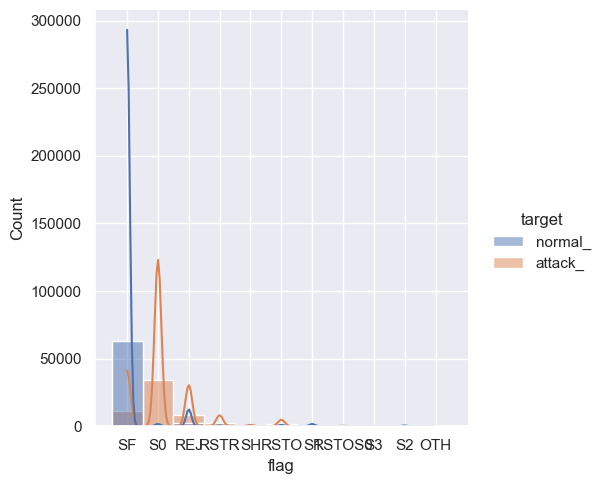

In [135]:
plt.figure(figsize=(10, 3))
sns.displot(x='flag', bins=100, kde=True,hue='target', data=df )

In [ ]:
**Distribution of Attack Categories**

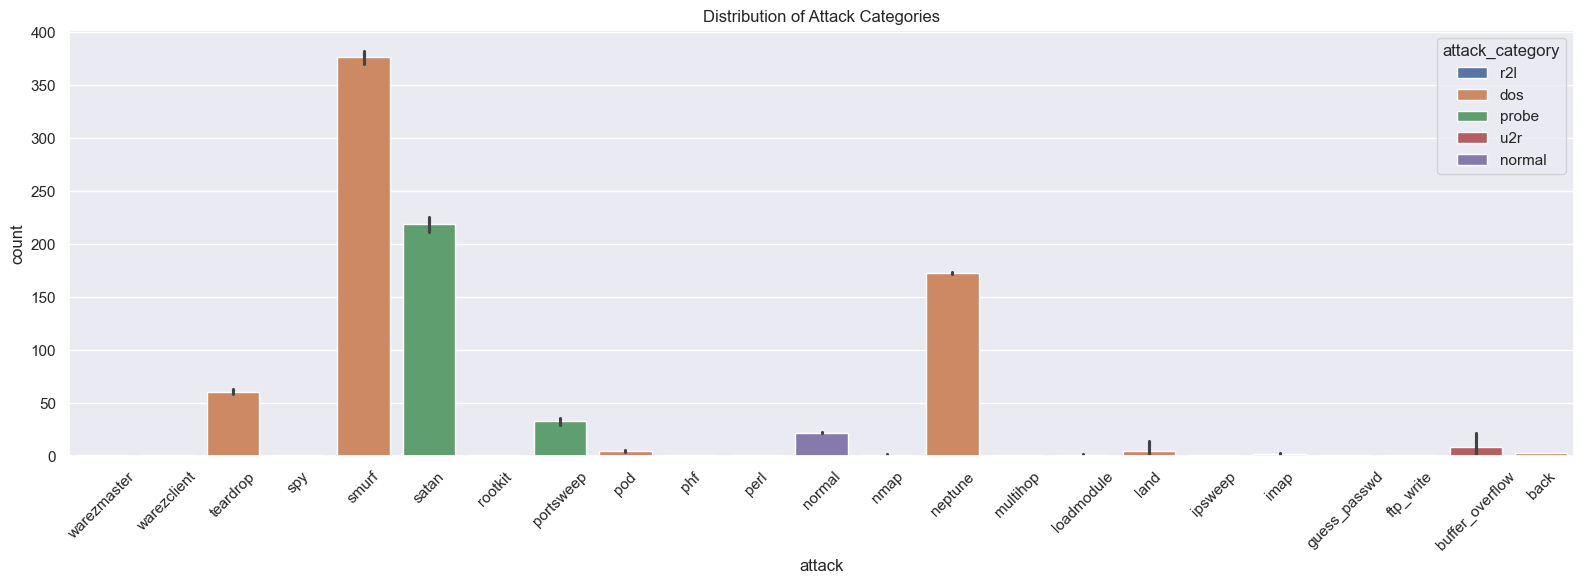

In [126]:
df_sorted = df.sort_values(by='attack', ascending=False)
plt.figure(figsize=(16, 6))  
sns.set(style="darkgrid")
ax = sns.barplot(x='attack', y="count", data=df_sorted, hue='attack_category')
plt.xticks(rotation=45)
plt.title("Distribution of Attack Categories")
plt.tight_layout()
plt.show()

**Conclusion: Distribution of attack categories**
- The attack type classified as DoS (Denial of service) having  smurf, neptune, teardrop as values followed by attack type Probe having satan, postweep as values are prominant.

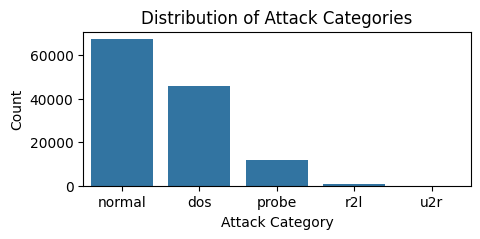

In [11]:
plt.figure(figsize=(5, 2))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.show()

## **Distribution of Numerical variables**

**Duration distribution**

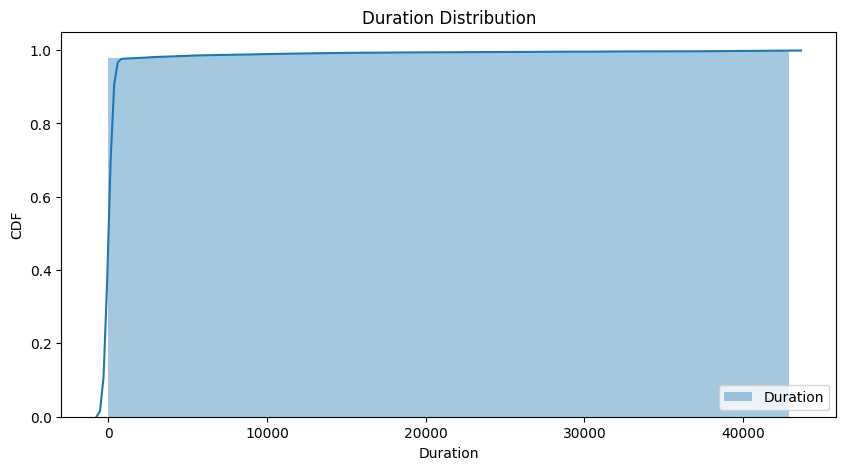

In [21]:
# Density plot for duration variable
plt.figure(figsize=(10,3))
kwargs = {'cumulative': True}
ax = sns.distplot(df['duration'].dropna(),label="Duration", hist_kws=kwargs, kde_kws=kwargs)
ax.set_title('Duration Distribution')
ax.set(xlabel='Duration', ylabel='CDF')
plt.legend()
plt.show()

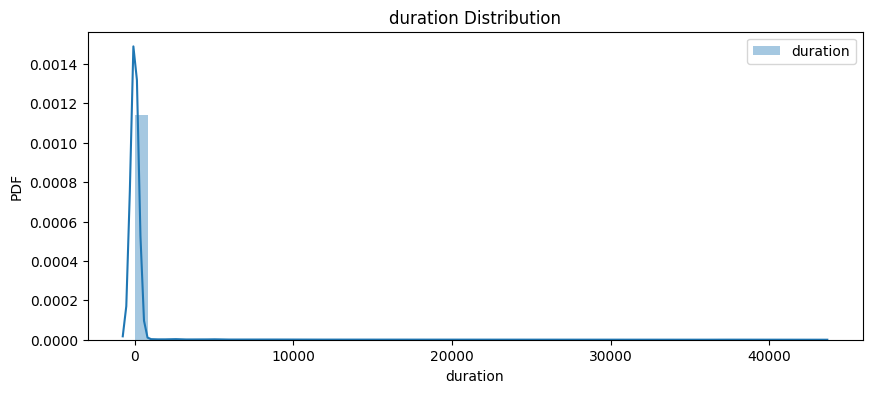

In [22]:
plt.figure(figsize=(10,4))
ax = sns.distplot(df['duration'].dropna(),label="duration")
ax.set_title('duration Distribution')
ax.set(xlabel='duration', ylabel='PDF')
plt.legend()
plt.show()

In [7]:
durationdf = df[df['duration'] > 1000]
durationdf1 = df[df['duration'] < 1000]
durationdf.shape, durationdf1.shape

((2773, 45), (123200, 45))

In [128]:
2773/(2773+123200)*100

2.2012653505116173

**Conclusion:**
- Distribution variable is right skewed.
- The Cumulative Density frequency (CDF curve) is steep at the beginning and flattens out quickly. This implies most data points are concentrated at
lower values.
- Let's visualize distribution of Duration less than 100 and greater than 1000 to understand it visually
- There are 2773 values greather than 1000 which is 2.2% of total rows and majority of the values are less than 1000 duration . 

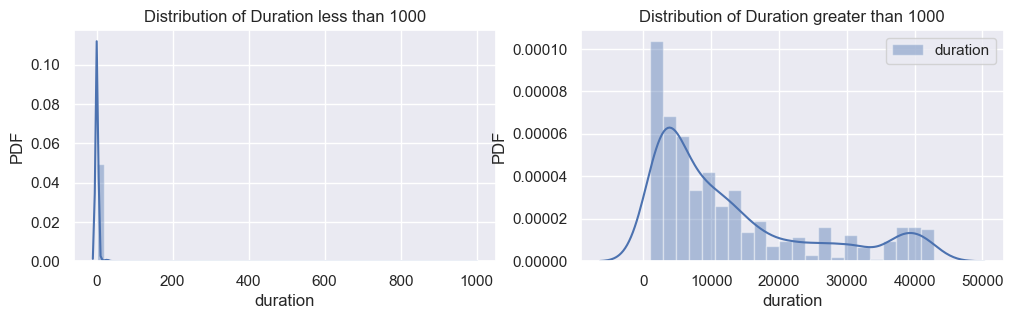

In [127]:
# Duration 
durationdf = df[df['duration'] > 1000]
durationdf1 = df[df['duration'] < 1000]
plt.figure(figsize=(12,3))
plt.subplot(1,2,1) #Row 1, column 2, Index 1
ax = sns.distplot(durationdf1['duration'].dropna(),label="duration")
ax.set_title('Distribution of Duration less than 1000')
ax.set(xlabel='duration', ylabel='PDF')

plt.subplot(1,2,2)
ax = sns.distplot(durationdf['duration'].dropna(),label="duration")
ax.set_title('Distribution of Duration greater than 1000')
ax.set(xlabel='duration', ylabel='PDF')
plt.legend()
plt.show()

**Conclusion:**
- Duration variable has long tail values and some values are extremely high. We need to investigate these outliers and how they are linked to target variable.

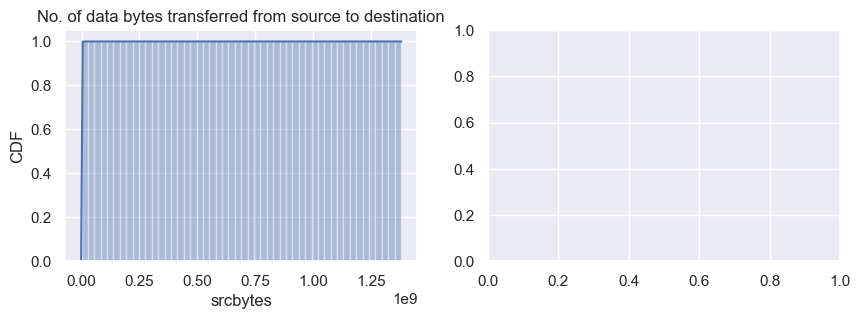

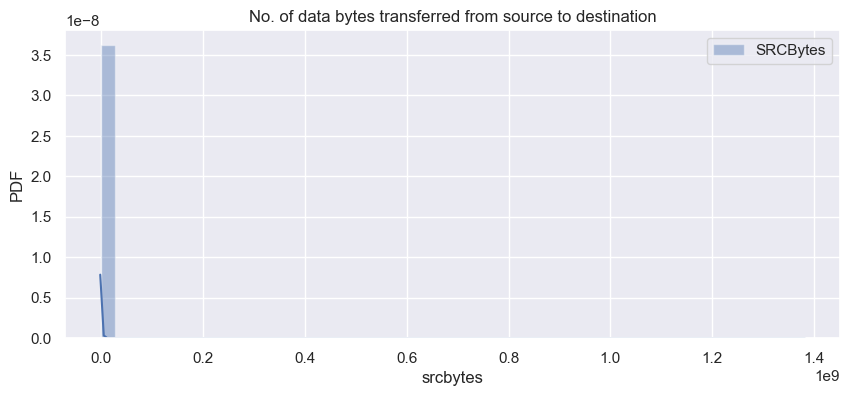

In [136]:
# Density plot for duration variable
plt.figure(figsize=(10,3))
plt.subplot(1,2,1) #Row 1, column 2, Index 1
kwargs = {'cumulative': True}
ax = sns.distplot(df['srcbytes'].dropna(),label="SRCBytes", hist_kws=kwargs, kde_kws=kwargs)
ax.set_title('No. of data bytes transferred from source to destination')
ax.set(xlabel='srcbytes', ylabel='CDF')
plt.subplot(1,2,2) 
plt.figure(figsize=(10,4))
ax = sns.distplot(df['srcbytes'].dropna(),label="SRCBytes")
ax.set_title('No. of data bytes transferred from source to destination')
ax.set(xlabel='srcbytes', ylabel='PDF')
plt.legend()
plt.show()

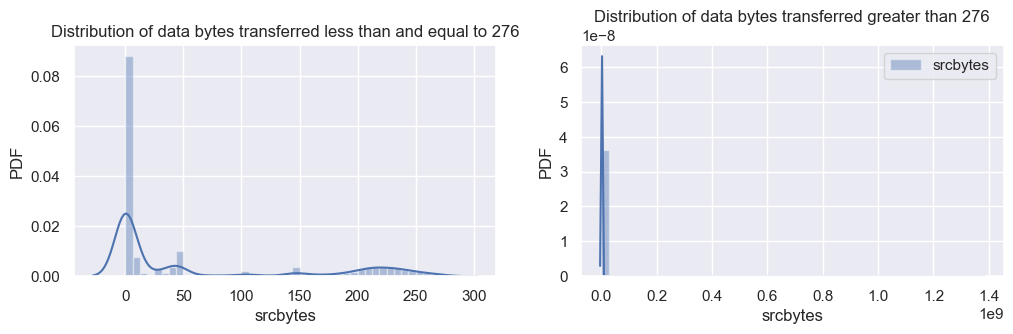

In [140]:
durationdf = df[df['srcbytes'] >= 276]
durationdf1 = df[df['srcbytes'] < 276]
plt.figure(figsize=(12,3))
plt.subplot(1,2,1) #Row 1, column 2, Index 1
ax = sns.distplot(durationdf1['srcbytes'].dropna(),label="srcbytes")
ax.set_title('Distribution of data bytes transferred less than and equal to 276')
ax.set(xlabel='srcbytes', ylabel='PDF')

plt.subplot(1,2,2)
ax = sns.distplot(durationdf['srcbytes'].dropna(),label="srcbytes")
ax.set_title('Distribution of data bytes transferred greater than 276')
ax.set(xlabel='srcbytes', ylabel='PDF')
plt.legend()
plt.show()

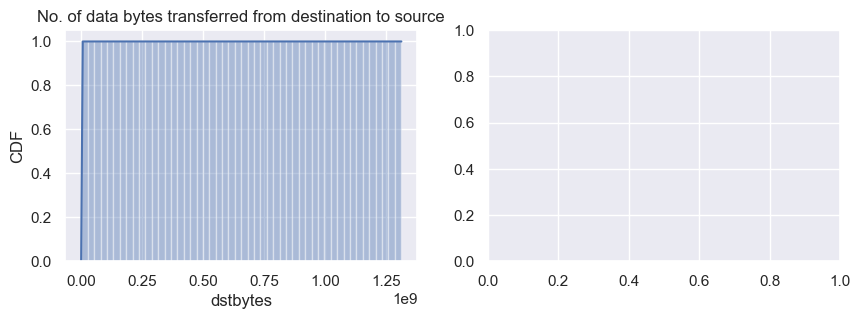

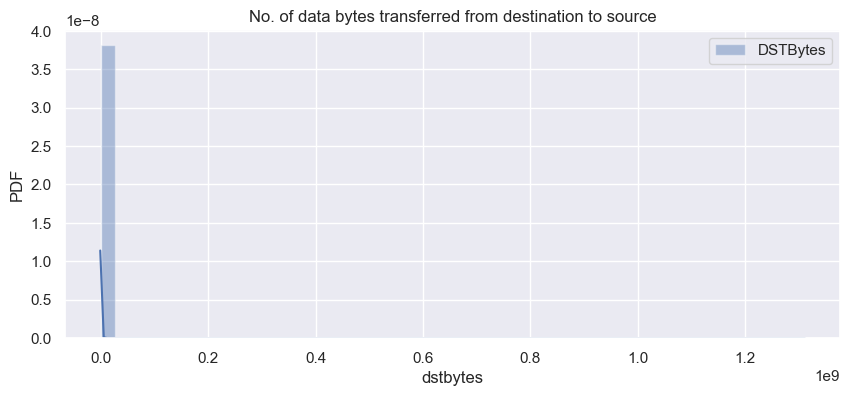

In [141]:
# Density plot for DST Bytes variable
plt.figure(figsize=(10,3))
plt.subplot(1,2,1) #Row 1, column 2, Index 1
kwargs = {'cumulative': True}
ax = sns.distplot(df['dstbytes'].dropna(),label="DSTBytes", hist_kws=kwargs, kde_kws=kwargs)
ax.set_title('No. of data bytes transferred from destination to source')
ax.set(xlabel='dstbytes', ylabel='CDF')
plt.subplot(1,2,2) 
plt.figure(figsize=(10,4))
ax = sns.distplot(df['dstbytes'].dropna(),label="DSTBytes")
ax.set_title('No. of data bytes transferred from destination to source')
ax.set(xlabel='dstbytes', ylabel='PDF')
plt.legend()
plt.show()

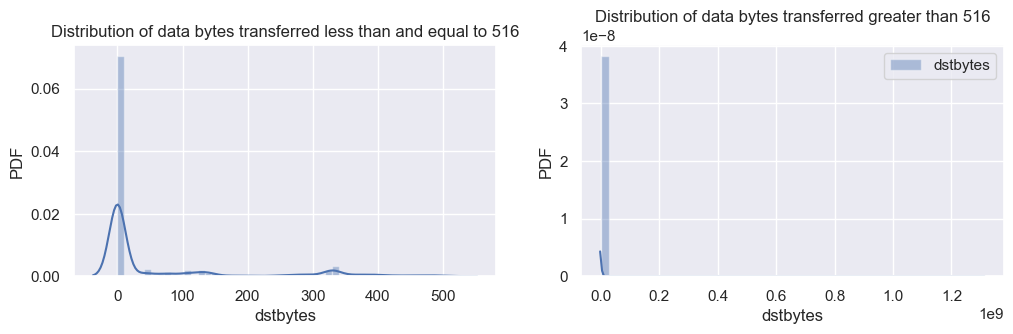

In [143]:
durationdf = df[df['dstbytes'] >= 516]
durationdf1 = df[df['dstbytes'] < 516]
plt.figure(figsize=(12,3))
plt.subplot(1,2,1) #Row 1, column 2, Index 1
ax = sns.distplot(durationdf1['dstbytes'].dropna(),label="dstbytes")
ax.set_title('Distribution of data bytes transferred less than and equal to 516')
ax.set(xlabel='dstbytes', ylabel='PDF')

plt.subplot(1,2,2)
ax = sns.distplot(durationdf['dstbytes'].dropna(),label="dstbytes")
ax.set_title('Distribution of data bytes transferred greater than 516')
ax.set(xlabel='dstbytes', ylabel='PDF')
plt.legend()
plt.show()

##### Pairplot of Flag and Target variable

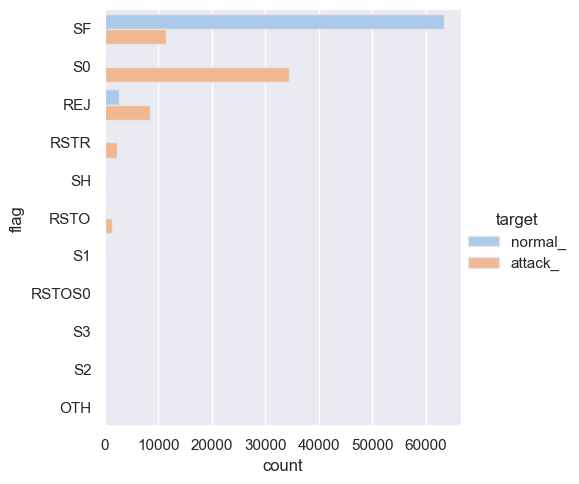

In [137]:
sns.catplot(data=df, y="flag", hue="target", kind="count",palette="pastel", edgecolor=".9")
plt.show()

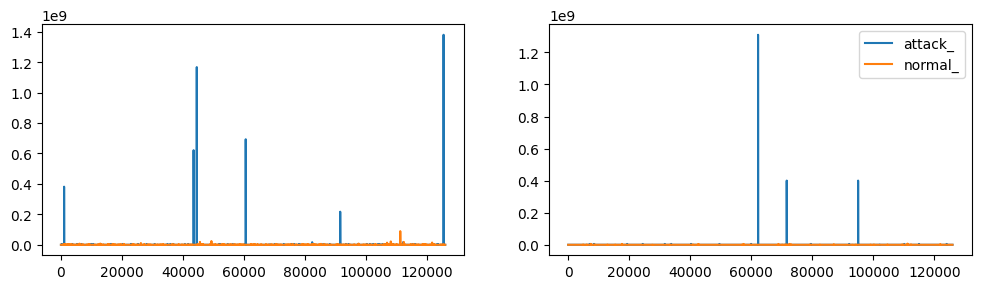

In [26]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
df.groupby('target')['srcbytes'].plot()
plt.subplot(1,2,2)
df.groupby('target')['dstbytes'].plot()
plt.legend()
plt.show()

**Conclusion:**
- It is observed that a very high number of bytes transferred from source to destination (srcbytes) and destination to source (dstbytes) in case of attack category.

**l______________________________________________________________________________________________________________________________________________________________________l**

## Outlier Detection and Hypothesis Testing

In [146]:
df = pd.read_csv("Network_anomaly_data.csv")
df.head(4)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.0,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21


**One HOt Encoding**

In [150]:
attack_mapping = {'back': 'attack_',    'buffer_overflow': 'attack_',     'ftp_write': 'attack_',    'guess_passwd': 'attack_',    'imap': 'attack_',
    'ipsweep': 'attack_',    'land': 'attack_',    'loadmodule': 'attack_',    'multihop': 'attack_',    'neptune': 'attack_',    'nmap': 'attack_',
    'perl': 'attack_',    'phf': 'attack_',    'pod': 'attack_',    'portsweep': 'attack_',    'rootkit': 'attack_',    'satan': 'attack_',
    'smurf': 'attack_',    'spy': 'attack_',    'teardrop': 'attack_',    'warezclient': 'attack_',    'warezmaster': 'attack_',    'normal': 'normal'}
df['target'] = df['attack'].map(attack_mapping)
df['target'].value_counts(normalize = True)

target
normal     0.534583
attack_    0.465417
Name: proportion, dtype: float64

In [151]:
df.drop(['attack'],axis=1,inplace=True)

In [152]:
dummies = ['protocoltype', 'service', 'flag', 'target']
data = pd.get_dummies(df, columns=dummies, drop_first=True)
data.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,protocoltype_tcp,protocoltype_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target_normal
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [148]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

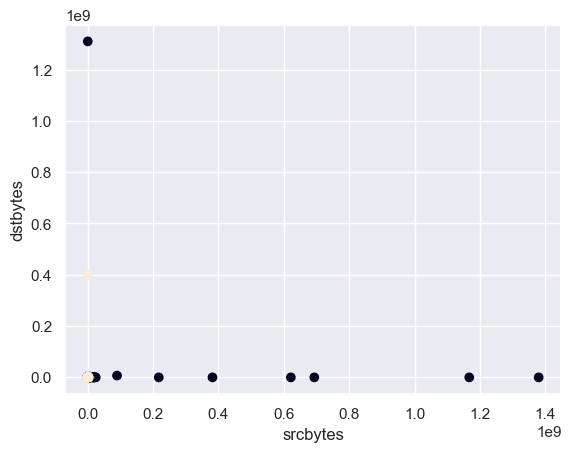

In [154]:
clf = LocalOutlierFactor(n_neighbors=25, contamination=0.08).fit_predict(data.iloc[:, :2])

data['is_outlier_lof'] = clf
plt.scatter(data['srcbytes'], data['dstbytes'], c=data['is_outlier_lof'])
plt.xlabel('srcbytes')
plt.ylabel('dstbytes')
plt.show()

In [155]:
data['is_outlier_lof'].value_counts()

is_outlier_lof
 1    115895
-1     10078
Name: count, dtype: int64

In [156]:
data['is_outlier_lof'].describe()

count    125973.000000
mean          0.839997
std           0.542592
min          -1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: is_outlier_lof, dtype: float64

In [159]:
data.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,protocoltype_tcp,protocoltype_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target_normal,is_outlier_lof
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,1,1
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [163]:
data = pd.DataFrame(data)

number of outliers :  (10078, np.int64(10078))


<Axes: xlabel='srcbytes', ylabel='dstbytes'>

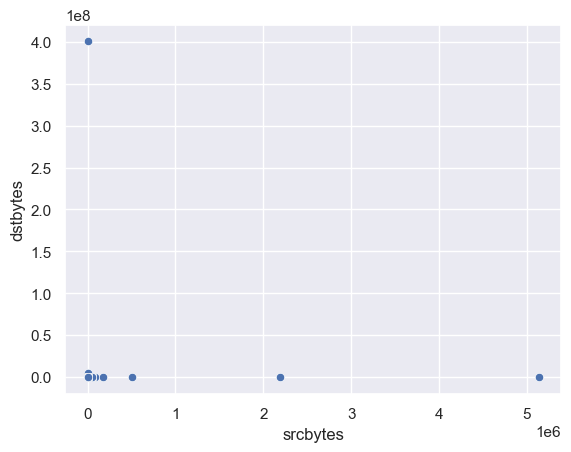

In [166]:
#data['is_outlier_lof'] = clf.fit_predict(data)

print("number of outliers : ",(len(data[data['is_outlier_lof'] == -1]), (data['is_outlier_lof'] == -1).sum()))
data = data[data['is_outlier_lof'] == 1]
sns.scatterplot(x='srcbytes', y='dstbytes', data=data)

In [167]:
data.shape

(115895, 122)

<Figure size 2000x1500 with 0 Axes>

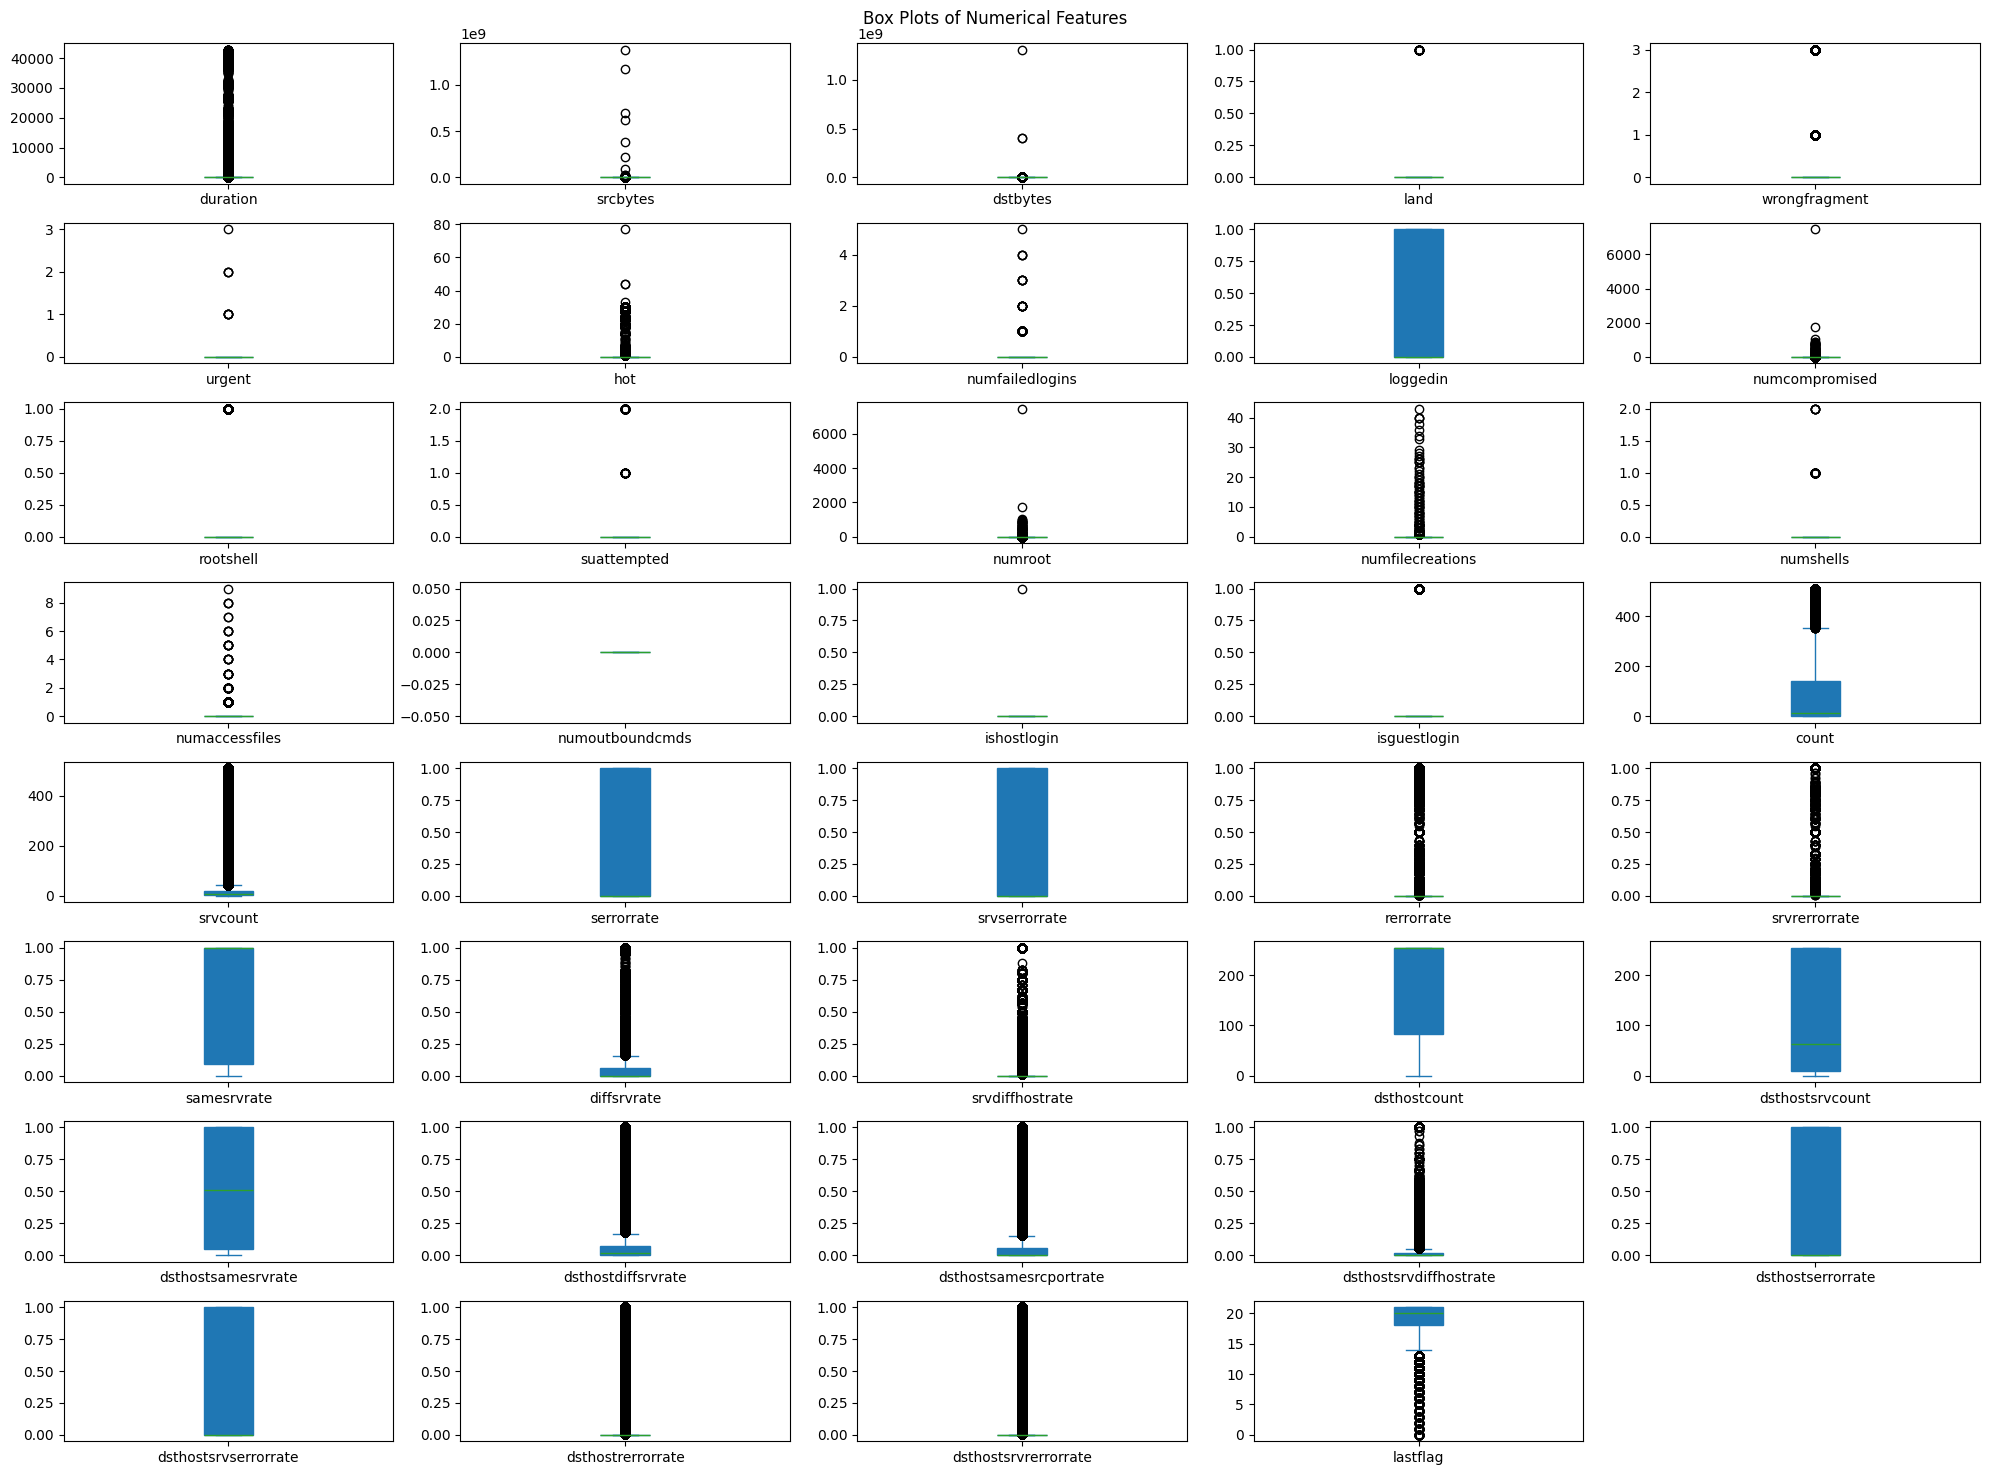

In [74]:
# Visualizing the distributions and outliers in numerical features using box plots
plt.figure(figsize=(20, 15))
data.select_dtypes(include=[np.number]).plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 15), patch_artist=True)  
# 8 rows, 5 columns for 40 plots
plt.suptitle('Box Plots of Numerical Features')
plt.tight_layout()
plt.show()

**Hypothesis Testing - after removing outliers**
 t-test independent
- 1. Network Traffic Volume and Anomalies:
- ●      Hypothesis: Network connections with unusually high or low traffic volume (bytes transferred) are more likely to be anomalous.
- ●      Tests: Use t-tests or ANOVA to compare the means of Src_bytes and Dst_bytes in normal versus anomalous connections.

- Null Hypothesis (H0): The average number of bytes transferred in normal connections is equal to that in anomalous connections.
- Alternative Hypothesis (H1): The average number of bytes transferred in normal connections is different from that in anomalous connections.

In [168]:
data['target_normal'].unique()

array([1, 0])

**T-Statistic for variable 'srcbytes' - Number of data bytes transferred from source to destination in a single connection**

In [169]:
normal_connections = data[data['target_normal'] == 1]['srcbytes']
anomalous_connections = data[data['target_normal'] == 0]['srcbytes']

print(f"Normal connections: {normal_connections.describe()}")
print(f"Anomalous connections: {anomalous_connections.describe()}")

Normal connections: count    5.830900e+04
mean     8.018732e+03
std      1.209711e+05
min      0.000000e+00
25%      8.800000e+01
50%      2.260000e+02
75%      3.040000e+02
max      2.194619e+06
Name: srcbytes, dtype: float64
Anomalous connections: count    5.758600e+04
mean     2.930785e+03
std      1.027784e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.133877e+06
Name: srcbytes, dtype: float64


In [31]:
from scipy.stats import ttest_ind, f_oneway
# Perform a t-test to compare the means
t_stat, p_value = ttest_ind(normal_connections, anomalous_connections, equal_var=False)  # Using Welch's t-test if variances differ

In [32]:
print("T-test results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in the bytes transferred between normal and anomalous connections.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the bytes transferred between normal and anomalous connections.")

T-test results:
T-statistic: -1.9616326188727324
P-value: 0.049809977020307705
We reject the null hypothesis. There is a significant difference in the bytes transferred between normal and anomalous connections.


**Conclusion:**
- The average number of bytes transferred from source to destination in normal connections is different from that in anomalous connections, As p-value for bytes transferred is less than 0.05 (actual value = 0.049)
- Although we reject the null hypothesis, p-value is extremely close to the threshhold. 

**T-Statistic for variable 'dstbytes' - Number of data bytes transferred from destination to source in a single connection**

In [170]:
normal_connections = data[data['target_normal'] == 1]['dstbytes']
anomalous_connections = data[data['target_normal'] == 0]['dstbytes']

print(f"Normal connections: {normal_connections.describe()}")
print(f"Anomalous connections: {anomalous_connections.describe()}")

Normal connections: count    5.830900e+04
mean     2.799363e+03
std      1.431679e+04
min      0.000000e+00
25%      7.700000e+01
50%      4.550000e+02
75%      2.239000e+03
max      2.776333e+06
Name: dstbytes, dtype: float64
Anomalous connections: count    5.758600e+04
mean     1.543271e+04
std      2.360470e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.002911e+08
Name: dstbytes, dtype: float64


In [171]:
t_stat, p_value = ttest_ind(normal_connections, anomalous_connections, equal_var=False)  # Use Welch's t-test if variances differ

In [172]:
print("T-test results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in the bytes transferred between normal and anomalous connections.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the bytes transferred between normal and anomalous connections.")

T-test results:
T-statistic: -1.284311301971205
P-value: 0.1990382202941962
We fail to reject the null hypothesis. There is no significant difference in the bytes transferred between normal and anomalous connections.


**Conclusion:**
-- The average number of bytes transferred from destination to source in normal connections is different from that in anomalous connections, As p-value for bytes transferred is less than 0.05 (actual value = 0.19)

In [214]:
data.head(3)

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,protocoltype_tcp,protocoltype_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target_normal,is_outlier_lof
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,20,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,1,1
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,19,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,1


**ANOVA - To determine whether there are significant differences in the means of the srcbytes across normal and anomalous connections. We will use a one-way ANOVA test.**

- Null Hypothesis (H0): The average number of bytes transferred in normal connections is equal to that in anomalous connections.
- Alternative Hypothesis (H1): The average number of bytes transferred in normal connections is different from that in anomalous connections.

##### Test of normality for ANOVA

In [33]:
df['attack_category'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [34]:
df['attack_category'].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [ ]:
# Testing assumptions of ANOVA

In [36]:
category_distribution = [group['srcbytes'] for name, group in df.groupby('attack_category')]
shapiro_results = [stats.shapiro(group) for group in category_distribution]

for name, result in zip(df['attack_category'].unique(), shapiro_results):
    print(f"Shapiro-Wilk test for {name}: W = {result.statistic}, p-value = {result.pvalue}")

Shapiro-Wilk test for normal: W = 0.13218598819291882, p-value = 1.2926852290707126e-156
Shapiro-Wilk test for dos: W = 0.009855350719979783, p-value = 1.9375197153584948e-172
Shapiro-Wilk test for r2l: W = 0.005470107769107169, p-value = 1.382189186776336e-119
Shapiro-Wilk test for probe: W = 0.25256951180639864, p-value = 1.1237094723725517e-52
Shapiro-Wilk test for u2r: W = 0.7312409333145737, p-value = 2.023719411276818e-08


**Interpretation of Results Shapiro-Wilk test for normality :**
- For each category below, both W and p-values are very low, suggesting strong deviations from normality. Here’s how to interpret each test result individually:
- **Normal:** W = 0.132 and p-value ≈ 1.29e-156 : A very low W-value and a p-value close to zero indicate a strong deviation from normality.
- **DOS:** W = 0.0099 and p-value ≈ 1.94e-172 : The W-value is extremely low, and the p-value is essentially zero, indicating this distribution is far from normal.
- **R2L:** W = 0.0055 and p-value ≈ 1.38e-119 : Both W and p-values are very low, indicating a non-normal distribution.
- **Probe:** W = 0.253 and p-value ≈ 1.12e-52 : This also indicates a non-normal distribution due to the low p-value, though the W-value is somewhat higher than the others.
- **U2R:** W = 0.731 and p-value ≈ 2.02e-08 :Here, the W-value is higher than in other cases, but the very low p-value still suggests that the data does not follow a normal distribution.
>**Since all categories have extremely low p-values (less than 0.05), we can reject the null hypothesis of normality for all of them. Non-parametric methods or transformations might be preferable for these data.
Standard statistical methods that assume normality (e.g., t-tests, parametric ANOVA) may not be appropriate for these distributions without transformation or alternative techniques.**


> As the dataset does not meet the normality assumption required for ANOVA, a non-parametric alternative can be used to compare the distributions. A suitable choice is the Kruskal-Wallis H test

**Kruskal-Wallis H Test**
**The Kruskal-Wallis test assesses whether there are statistically significant differences between the median ranks of the groups, making it a non-parametric alternative to one-way ANOVA. It is suitable for datasets with three or more independent groups.**
- Null Hypothesis : All groups have the same distribution (medians are equal).
- Alternate Hypothesis : At least one group differs in distribution (medians are not equal).

In [173]:
import scipy.stats as stats

In [185]:
df['attack_category'].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [189]:
normal = df[df['attack_category'] == 'normal']
normal.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
12,0,tcp,http,SF,287,2251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,7,0.0,0.0,0.0,0.0,1.00,0.00,0.43,8,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal,21,normal


In [193]:
attack_groups = ['attack_category', 'srcbytes']
for attack_level, group in df.groupby('attack_category')['srcbytes']:
    attack_groups.append(group)
normal = df[df['attack_category'] == 'normal']['srcbytes'].values
dos = df[df['attack_category'] == 'dos']['srcbytes'].values
r2l = df[df['attack_category'] == 'r2l']['srcbytes'].values
probe = df[df['attack_category'] == 'probe']['srcbytes'].values
u2r = df[df['attack_category'] == 'u2r']['srcbytes'].values

kruskal_result = stats.kruskal(normal, dos, probe, r2l, u2r)
print("Kruskal-Wallis H-test Result")
print("H-statistic:", kruskal_result.statistic)
print("p-value:", kruskal_result.pvalue)

Kruskal-Wallis H-test Result
H-statistic: 68347.04983221697
p-value: 0.0


In [194]:
attack_groups = ['attack_category', 'dstbytes']
for attack_level, group in df.groupby('attack_category')['dstbytes']:
    attack_groups.append(group)
normal = df[df['attack_category'] == 'normal']['dstbytes'].values
dos = df[df['attack_category'] == 'dos']['dstbytes'].values
r2l = df[df['attack_category'] == 'r2l']['dstbytes'].values
probe = df[df['attack_category'] == 'probe']['dstbytes'].values
u2r = df[df['attack_category'] == 'u2r']['dstbytes'].values

kruskal_result = stats.kruskal(normal, dos, probe, r2l, u2r)

print("Kruskal-Wallis H-test Result")
print("H-statistic:", kruskal_result.statistic)
print("p-value:", kruskal_result.pvalue)

Kruskal-Wallis H-test Result
H-statistic: 72122.47580082736
p-value: 0.0


**Conclusion:**
- H-statistic: Very high H-statistic (68347 for srcbytes and 72122 for dstbytes) indicates a greater difference between the groups.
- As p-value is 0.0, we reject the null hypothesis. It implies that there is a statistically significant difference between the distributions of at least one group compared to others.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Hypothesis Testing - 2. Impact of Protocol Type on Anomaly Detection:**
- Hypothesis: Certain protocols are more frequently associated with network anomalies.
- Tests: Chi-square test to determine if the distribution of Protocol_type differs significantly in normal and anomalous connections.

> **Null Hypothesis** (H₀): There is no association between Protocol_type and connection type (normal or anomalous). Any observed differences in the distribution of protocols across these categories are due to chance.
> **Alternative Hypothesis** (H₁): There is an association between Protocol_type and connection type, indicating certain protocols are more frequently associated with anomalies.

In [ ]:
from scipy.stats import chi2_contingency

In [196]:
# Create a contingency table
contingency_table = pd.crosstab(df['protocoltype'], df['target'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square test statistic: {chi2}')
print(f'p-value: {p}')

Chi-square test statistic: 10029.24862778463
p-value: 0.0


**Hypothesis Testing - 2. Impact of Service Type on Anomaly Detection:**
- Hypothesis: Certain Service type are more frequently associated with network anomalies.
- Tests: Chi-square test to determine if the distribution of Service type differs significantly in normal and anomalous connections.

> **Null Hypothesis** (H₀): There is no association between Service type and connection type (normal or anomalous). Any observed differences in the distribution of Service types across these categories are due to chance.
> **Alternative Hypothesis** (H₁): There is an association between Service type and connection type, indicating certain protocols are more frequently associated with anomalies.

In [197]:
# Create a contingency table
contingency_table = pd.crosstab(df['service'], df['target'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square test statistic: {chi2}')
print(f'p-value: {p}')

Chi-square test statistic: 93240.03213516616
p-value: 0.0


**Interpretation of Chi square test results for protocol type and service type with connection type (normal or anomalous):**
- Chi-square test statistic for protocol type = 10029 & service type = 93240: This very high test statistic suggests a substantial deviation from the expected values under the assumption that Protocol_type / service type and connection type (normal vs. anomalous) are independent. This implies that there is likely a strong association between the protocol_type / service_type and whether a connection is anomalous.
- p-value = 0.0: A p-value of 0.0 (or effectively < 0.05) for protocol type and for service_type is highly significant, meaning we can reject the null hypothesis with a high degree of confidence. This indicates that the observed distribution of Protocol_type / service_type in normal and anomalous connections is unlikely to be due to chance.
- These results suggest that certain protocol types / service types are significantly more associated with network anomalies. In practical terms, this means that protocol type / servie type likely plays a meaningful role in distinguishing between normal and anomalous network connections.

In [ ]:
4. Connection Status and Anomalies:
●      Hypothesis: Error flags in the Flag feature are significantly associated with anomalies.
●      Tests: Use logistic regression to assess the impact of connection status on the likelihood of an anomaly.


In [198]:
import statsmodels.api as sm

In [215]:
df.head(2)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,attack_category,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20,normal,normal_
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15,normal,normal_


In [209]:
df_1 = df[['target', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0','flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF',
       'flag_SH']]

In [224]:
df_1.head()

,target,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,normal_,0,0,0,0,0,0,0,0,1,0
1,normal_,0,0,0,0,0,0,0,0,1,0
2,attack_,0,0,0,0,1,0,0,0,0,0
3,normal_,0,0,0,0,0,0,0,0,1,0
4,normal_,0,0,0,0,0,0,0,0,1,0


In [220]:
df_1['flag_REJ'] = df_1['flag_REJ'].astype(int)
df_1['flag_RSTO'] = df_1['flag_RSTO'].astype(int)
df_1['flag_RSTOS0'] = df_1['flag_RSTOS0'].astype(int)
df_1['flag_RSTR'] = df_1['flag_RSTR'].astype(int)
df_1['flag_S0'] = df_1['flag_S0'].astype(int)
df_1['flag_S1'] = df_1['flag_S1'].astype(int)
df_1['flag_S2'] = df_1['flag_S2'].astype(int)
df_1['flag_S3'] = df_1['flag_S3'].astype(int)
df_1['flag_SF'] = df_1['flag_SF'].astype(int)
df_1['flag_SH'] = df_1['flag_SH'].astype(int)

In [226]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   flag_REJ        125973 non-null  int64
 1   flag_RSTO       125973 non-null  int64
 2   flag_RSTOS0     125973 non-null  int64
 3   flag_RSTR       125973 non-null  int64
 4   flag_S0         125973 non-null  int64
 5   flag_S1         125973 non-null  int64
 6   flag_S2         125973 non-null  int64
 7   flag_S3         125973 non-null  int64
 8   flag_SF         125973 non-null  int64
 9   flag_SH         125973 non-null  int64
 10  target_normal_  125973 non-null  bool 
dtypes: bool(1), int64(10)
memory usage: 9.7 MB


In [225]:
df_1 = pd.get_dummies(df_1, columns=['target'], drop_first=True)

In [229]:
# Prepare data
# Encode Flag feature (if it's categorical, you may need to convert it to dummy variables)
df_1 = pd.get_dummies(df_1, columns=['target'], drop_first=True)

# Define independent variables (Flag features) and dependent variable (Anomaly)
X = df_1[[col for col in df.columns if 'flag_' in col]]  # Only 'Flag' related columns
y = df_1['target_normal_']

# Add a constant term to the model
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Output results
print(result.summary())

         Current function value: 0.330741
         Iterations: 35


C:\Users\Neha Naik\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:         target_normal_   No. Observations:               125973
Model:                          Logit   Df Residuals:                   125962
Method:                           MLE   Df Model:                           10
Date:                Sun, 03 Nov 2024   Pseudo R-squ.:                  0.5212
Time:                        14:55:02   Log-Likelihood:                -41664.
converged:                      False   LL-Null:                       -87016.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.1575      0.346     -3.349      0.001      -1.835      -0.480
flag_REJ        0.0034      0.346      0.010      0.992      -0.676       0.682
flag_RSTO      -0.6561      0.353     -1.857    

**Interpetation of Logistic Regression results for Flag:**
- Service flag S1 has significant coefficient. these flags are associated with a higher (or lower) probability of a connection being anomalous

**5. Influence of Urgent Packets:**
-      Hypothesis: Connections that include urgent packets are more likely to be anomalous.
-      Tests: Logistic regression to evaluate whether the presence of Urgent packets increases the odds of an anomaly.

In [239]:
df_2 = df[['target', 'urgent']]
df_2.head(2)

,target,urgent
0,normal_,0
1,normal_,0


In [232]:
df_2['urgent'].unique()

array([0, 1, 3, 2])

In [242]:
df_2.head(3)

,target_normal_,urgent_1,urgent_2,urgent_3
0,True,False,False,False
1,True,False,False,False
2,False,False,False,False


In [240]:
df_2 = pd.get_dummies(df_2, columns=['target', 'urgent'], drop_first=True)

In [243]:
df_2['urgent_1'] = df_2['urgent_1'].astype(int)
df_2['urgent_2'] = df_2['urgent_2'].astype(int)
df_2['urgent_3'] = df_2['urgent_3'].astype(int)

In [244]:
# Define independent variables (Flag features) and dependent variable (Anomaly)
X = df_2[[col for col in df_2.columns if 'urgent' in col]]  # Only 'urgent' related columns
y = df_2['target_normal_']

# Add a constant term to the model
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Output results
print(result.summary())

         Current function value: 0.690747
         Iterations: 35


C:\Users\Neha Naik\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:         target_normal_   No. Observations:               125973
Model:                          Logit   Df Residuals:                   125969
Method:                           MLE   Df Model:                            3
Date:                Sun, 03 Nov 2024   Pseudo R-squ.:               8.935e-06
Time:                        15:46:45   Log-Likelihood:                -87015.
converged:                      False   LL-Null:                       -87016.
Covariance Type:            nonrobust   LLR p-value:                    0.6696
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1385      0.006     24.522      0.000       0.127       0.150
urgent_1       0.2670      0.913      0.292      0.770      -1.522       2.056
urgent_2       0.5546      1.225      0.453      0.6

**Interpetation of Logistic Regression results for Urgent Packet:**
- Description of variable Urgent : Number of urgent packets in this connection. Urgent packets are packets with the urgent bit activated.
- Urgent Packet 3 has significant coefficient (12.79). This packet is associated with a higher probability of a connection being anomalous.

**Additional points for EDA**

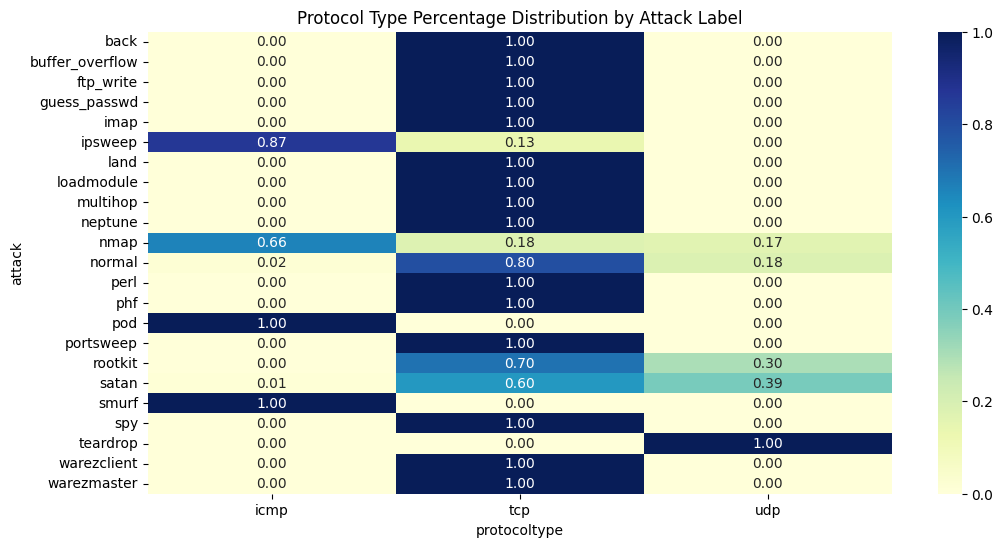

In [72]:
# Protocol Type distribution by attack lable heatmap
protocol_counts = df.groupby(['attack', 'protocoltype']).size().unstack().fillna(0)
protocol_percentage = protocol_counts.div(protocol_counts.sum(axis=1), axis=0)
plt.figure(figsize=(12, 6))
sns.heatmap(protocol_percentage, annot=True, fmt=".2f", cmap="YlGnBu", annot_kws={"size": 10})
plt.title('Protocol Type Percentage Distribution by Attack Label')
plt.show()

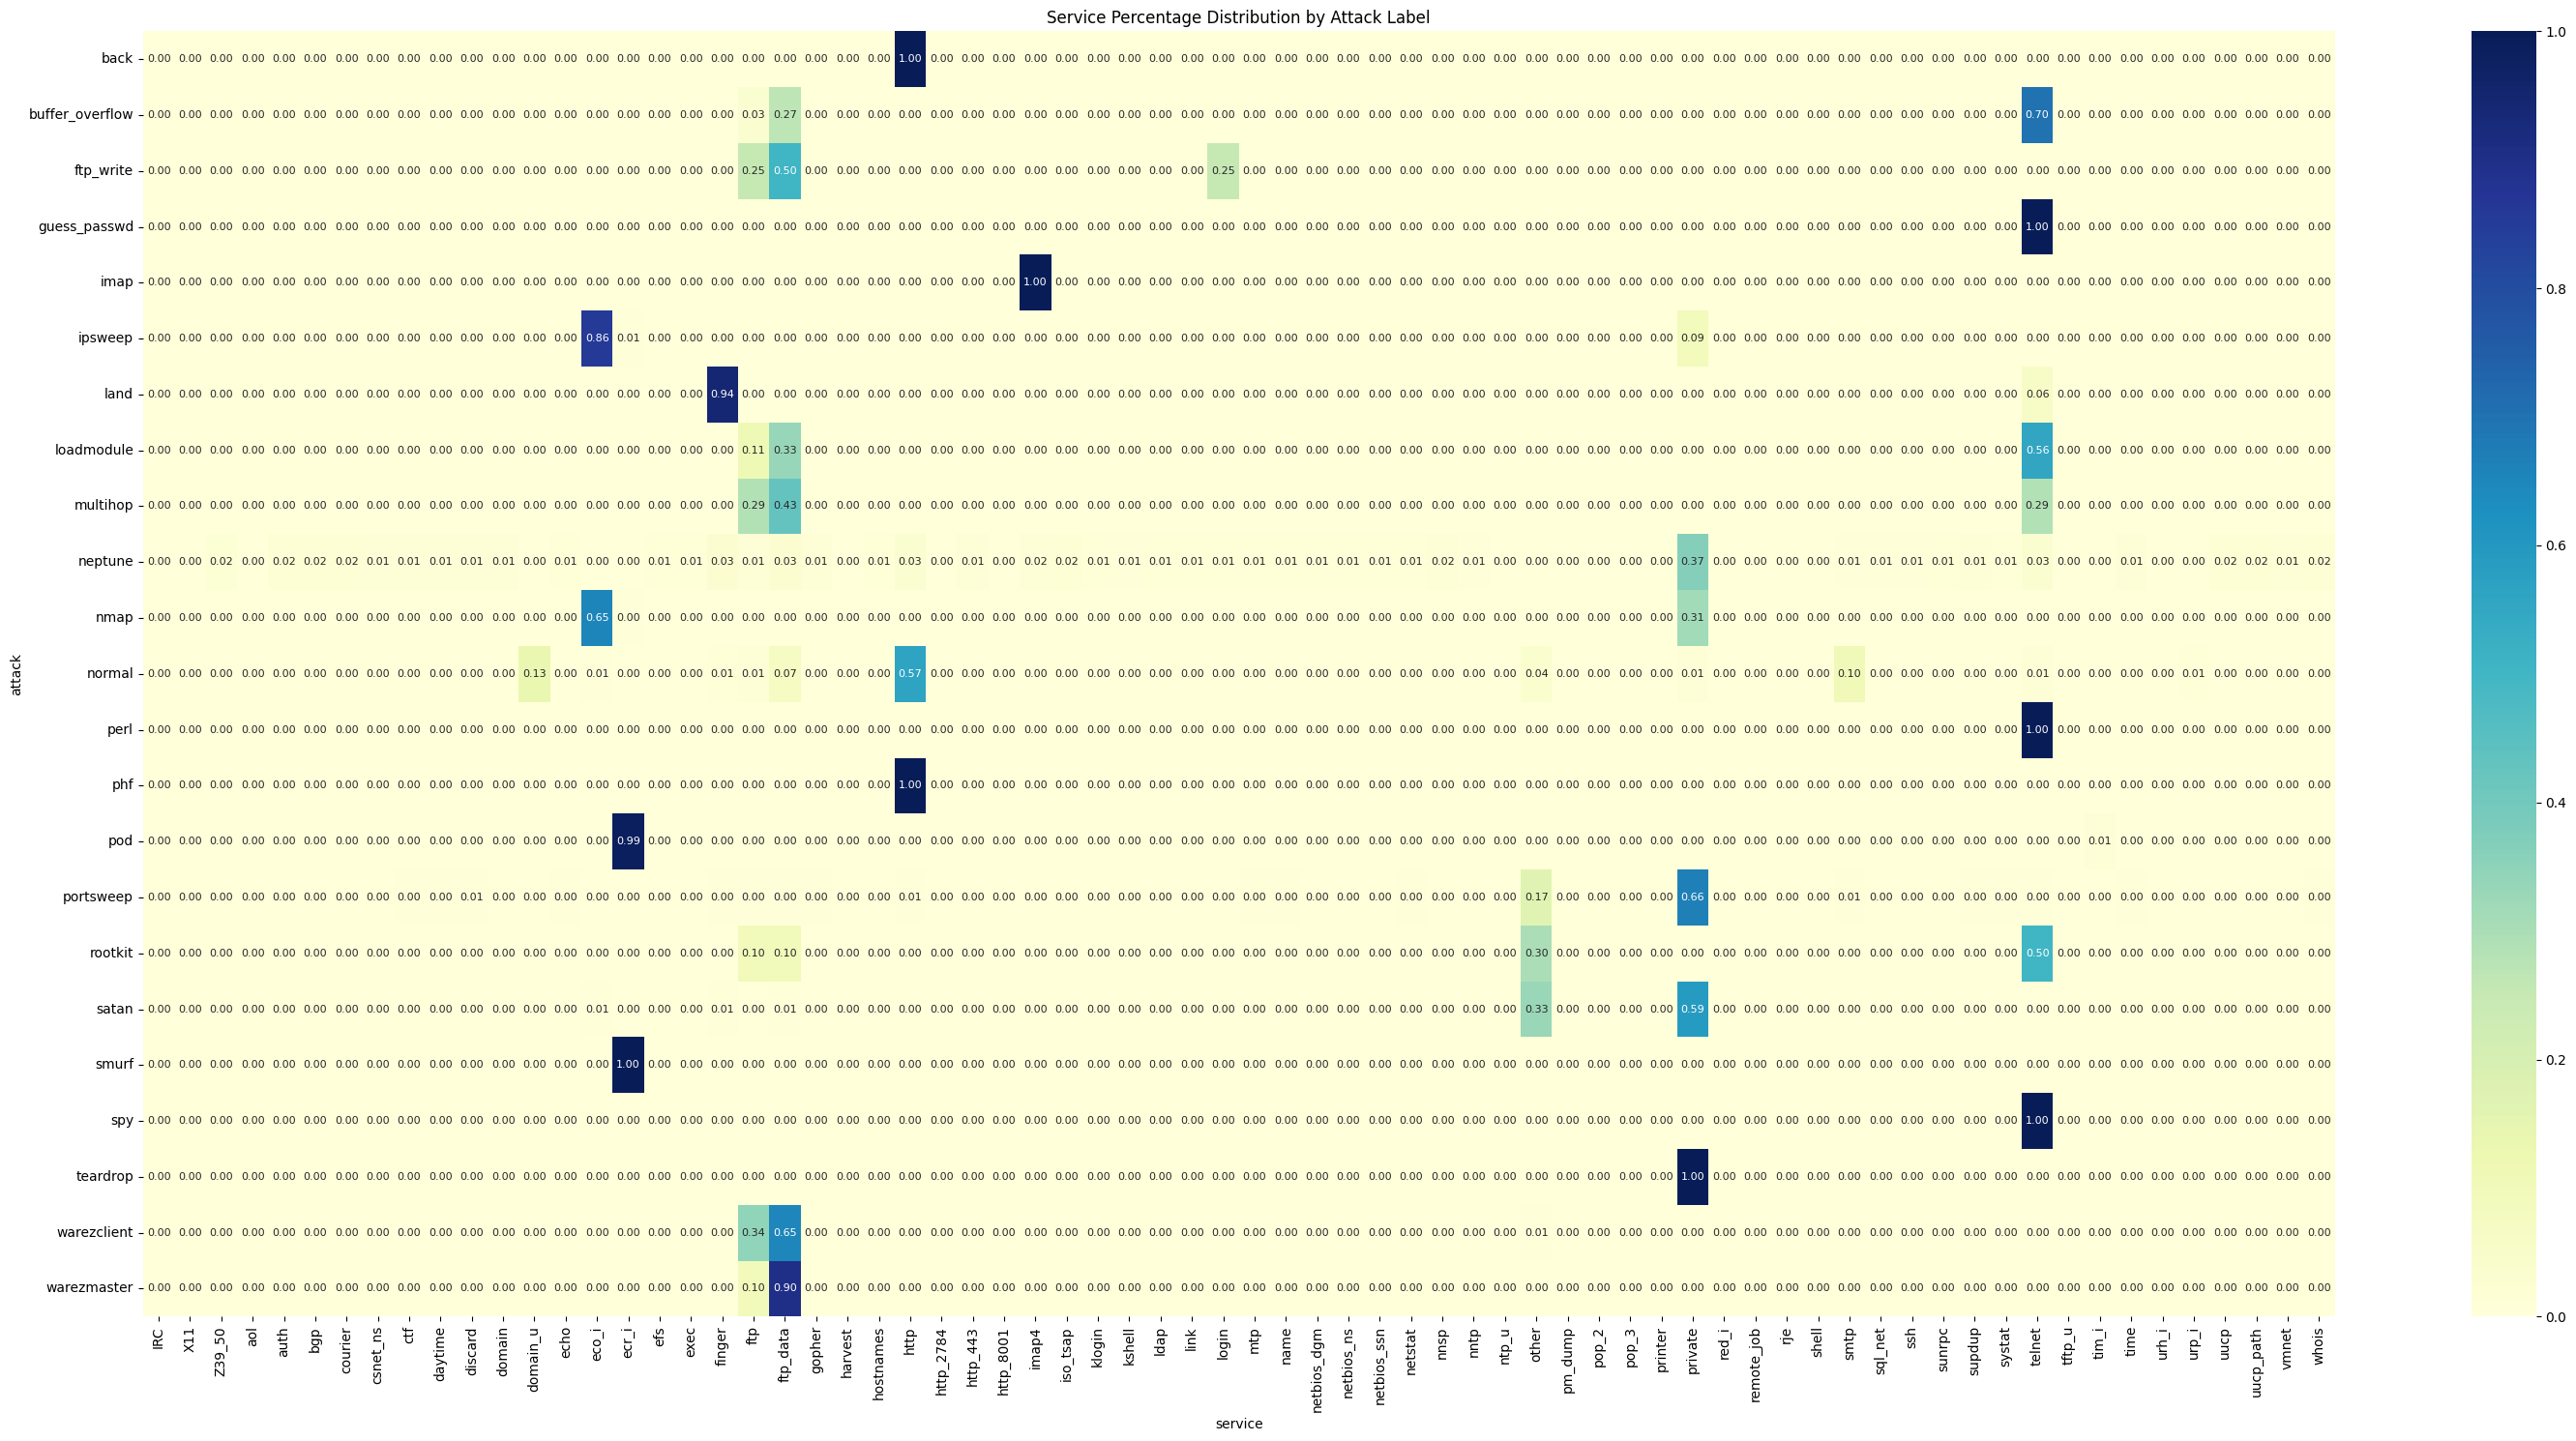

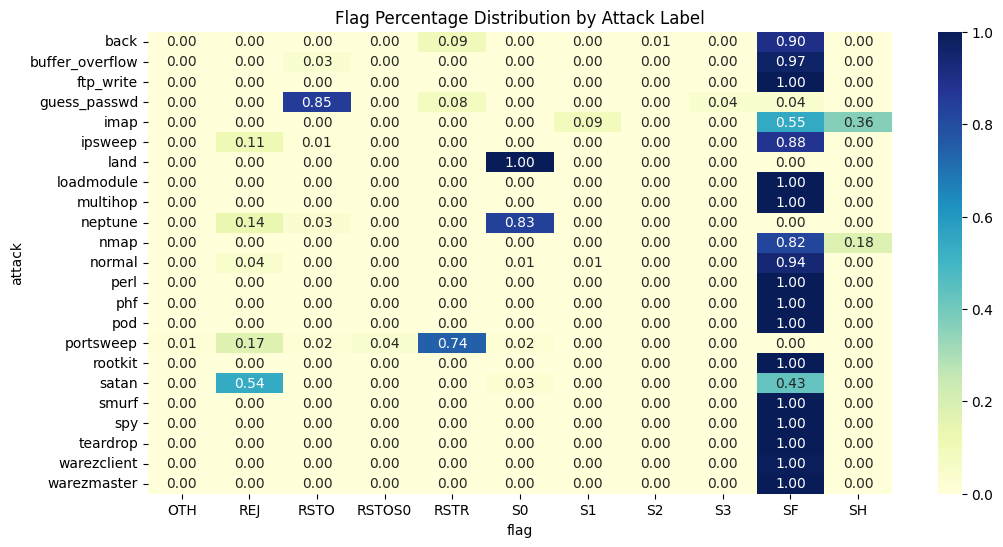

In [73]:
# Service distribution by attack lable heatmap
service_counts = df.groupby(['attack', 'service']).size().unstack().fillna(0)
service_percentage = service_counts.div(service_counts.sum(axis=1), axis=0)
plt.figure(figsize=(30, 15))  
sns.heatmap(service_percentage, annot=True, fmt=".2f", cmap="YlGnBu", annot_kws={"size": 8})
plt.title('Service Percentage Distribution by Attack Label')
plt.xticks(rotation=90)  
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()

# Flag distribution by attack lable heatmap
flag_counts = df.groupby(['attack', 'flag']).size().unstack().fillna(0)
flag_percentage = flag_counts.div(flag_counts.sum(axis=1), axis=0)
plt.figure(figsize=(12, 6))
sns.heatmap(flag_percentage, annot=True, fmt=".2f", cmap="YlGnBu", annot_kws={"size": 10})
plt.title('Flag Percentage Distribution by Attack Label')
plt.show()

<Figure size 2000x1500 with 0 Axes>

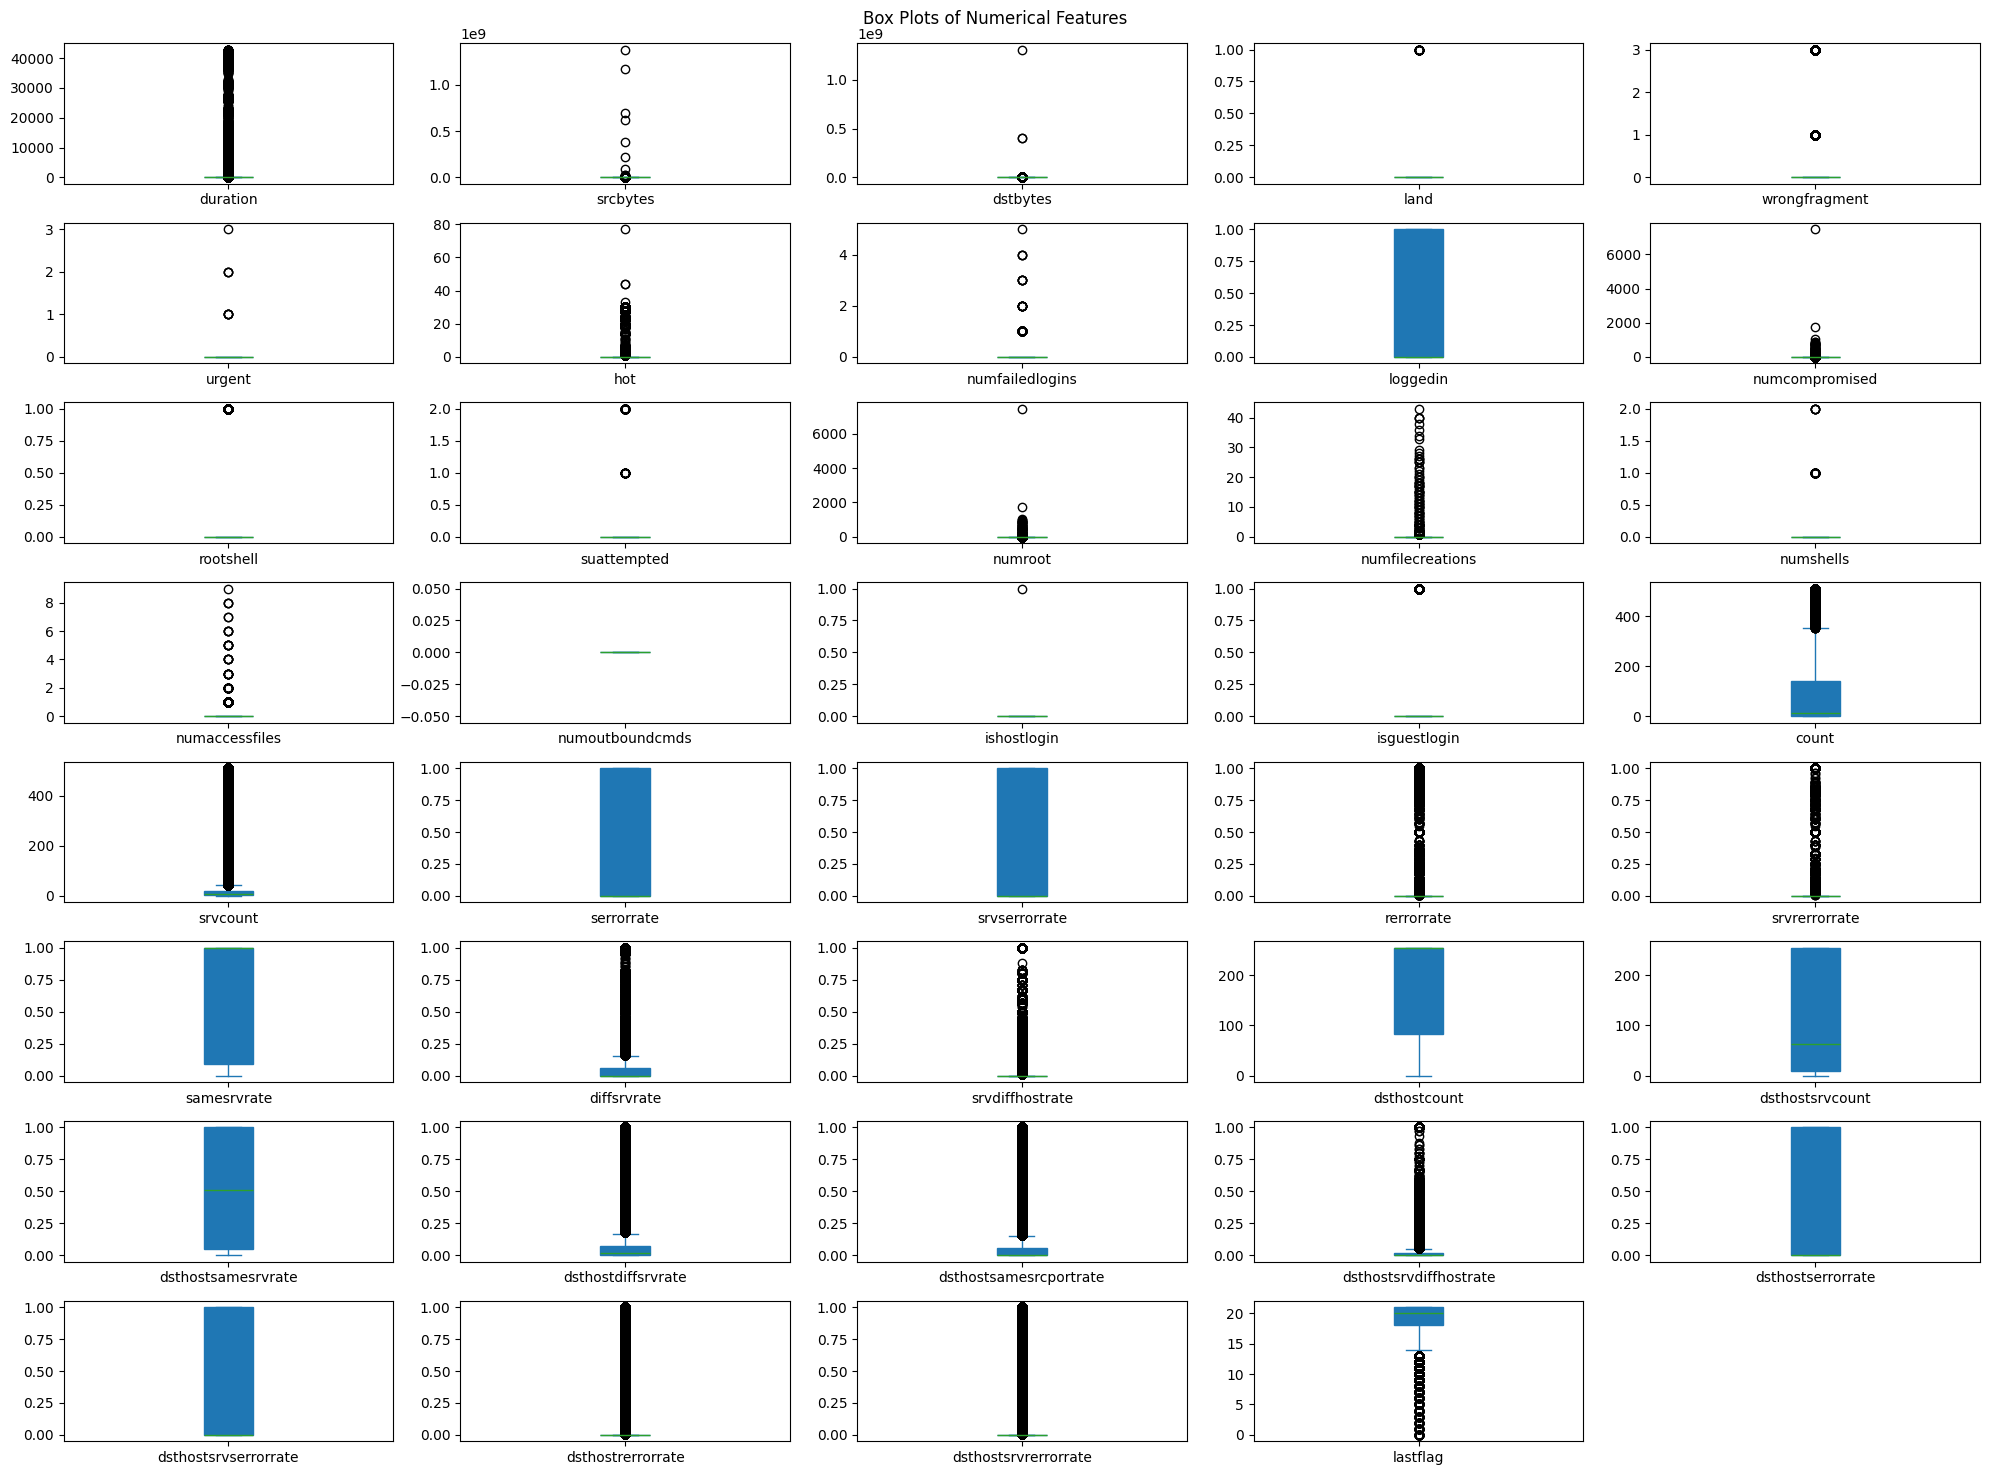

In [74]:
# Visualizing the distributions and outliers in numerical features using box plots
plt.figure(figsize=(20, 15))
df.select_dtypes(include=[np.number]).plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 15), patch_artist=True)  
# 8 rows, 5 columns for 40 plots
plt.suptitle('Box Plots of Numerical Features')
plt.tight_layout()
plt.show()

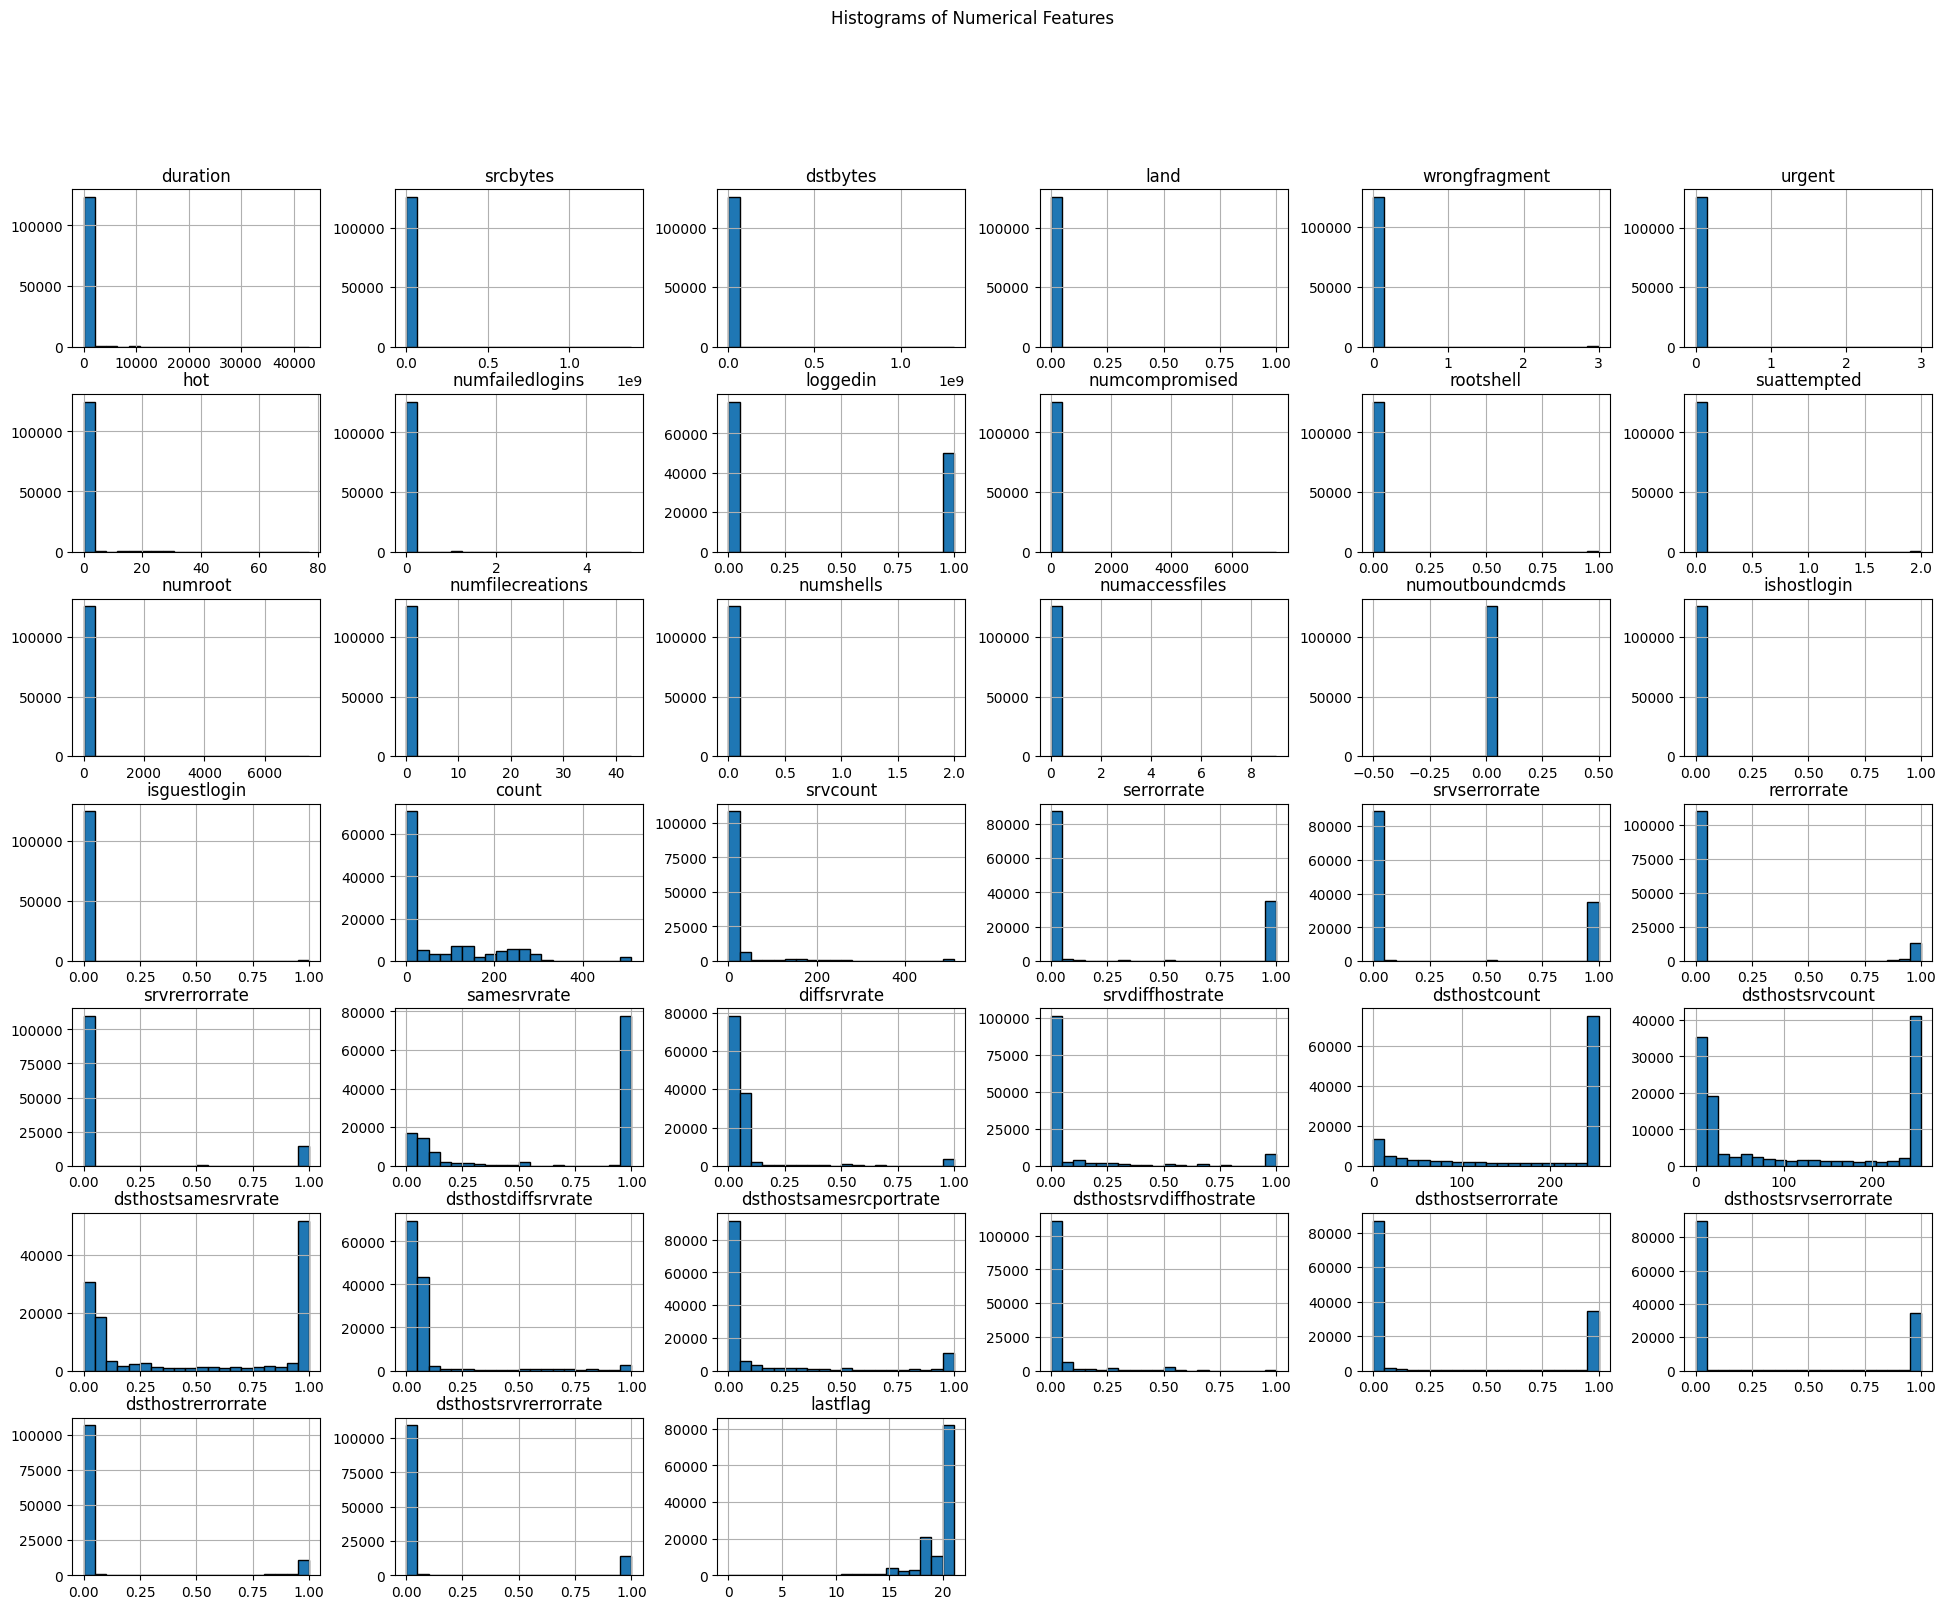

In [75]:
# Plot histograms for each numerical feature
df.select_dtypes(include=[np.number]).hist(figsize=(24, 18), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [83]:
# Identify binary and nonbinary features (those with exactly two unique values, 0 and 1)
# drop the feature num_outbound_cmds since it only contains 0
# 5 binary features, 32 nonbinary features, will be used later especially during the standarisation
binary_features = ['land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login']
nonbinary_features = ['duration', 'srcbytes', 'dstbytes', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'numcompromised', 'suattempted', 
                      'numroot', 'numfilecreations', 'numshells', 'numaccessfiles', 'count', 'srvcount', 'serrorrate', 'srvserrorrate', 
                      'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
                      'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 
                      'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate']

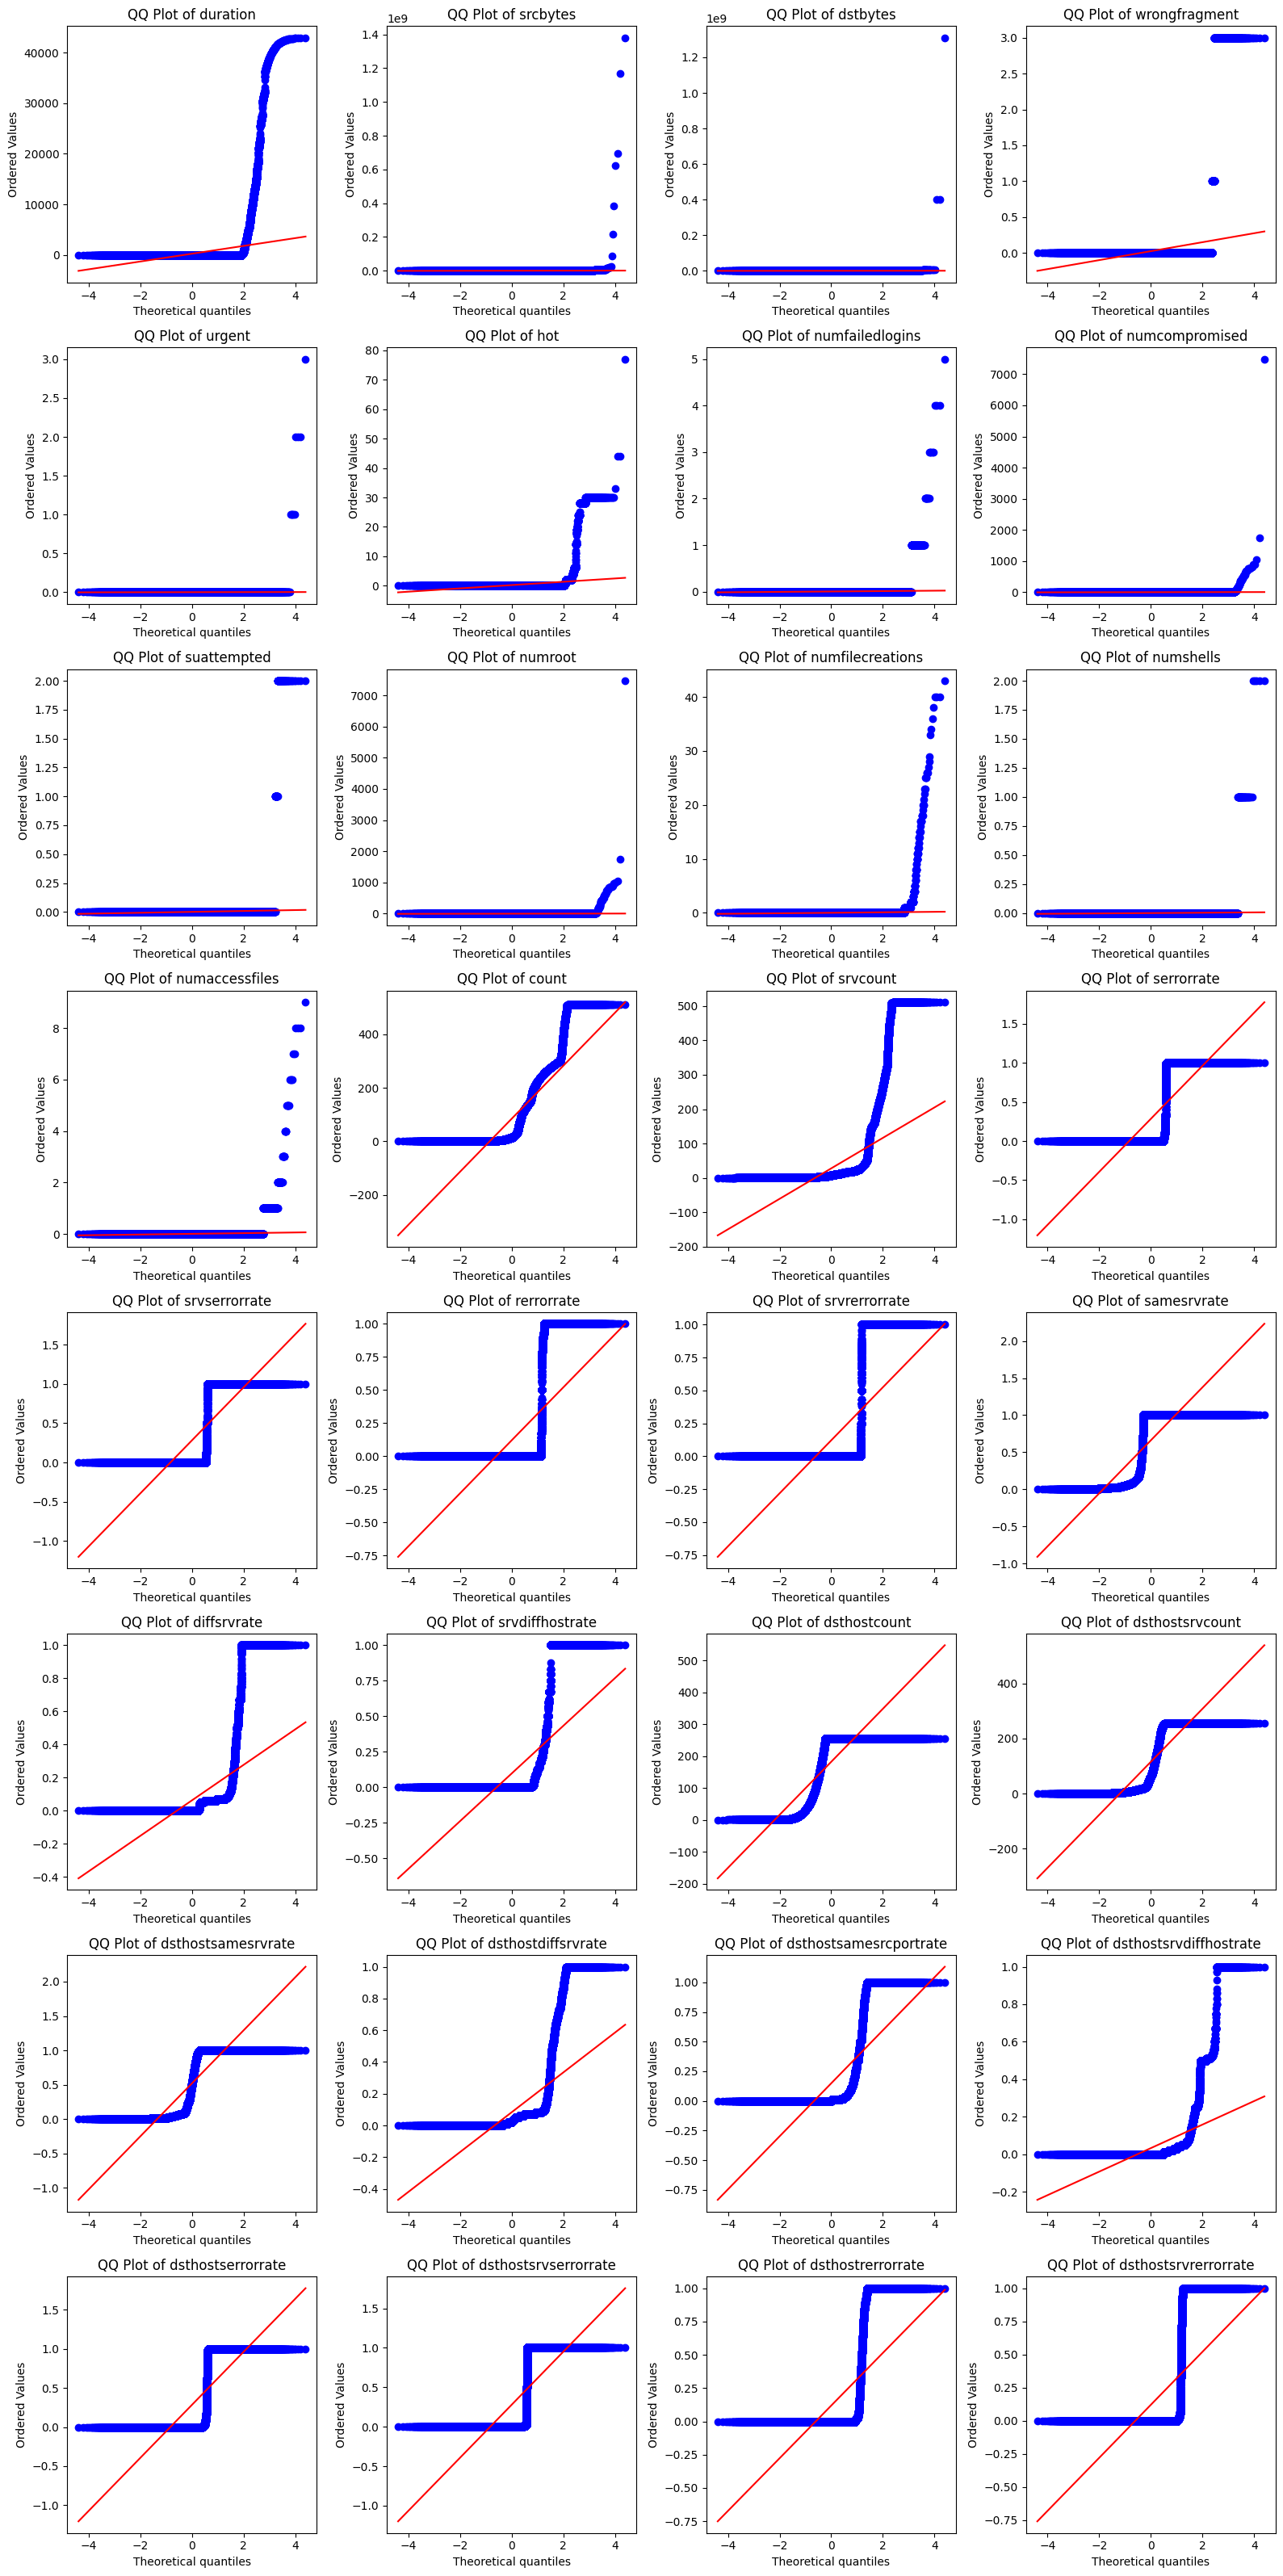

In [84]:
num_cols = 4  # four plots each row
num_features = len(nonbinary_features)
num_rows = (num_features + num_cols - 1) // num_cols  # number of rows for displaying
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 4))
axes = axes.flatten()
# draw each qq-plots
for i, col in enumerate(nonbinary_features):
    stats.probplot(df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f"QQ Plot of {col}")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

**Interpretation of QQ plots**
- For QQ plot, the data values are ordered and cumulative distribution values are calculated as (i-0.05)/n of the 'i'th ordered value out of 'n' total values. Tthis gives proportion of the data that falls below a certain a value.
- This process is done with a standard normal distribution (Gaussion distribution with a mean 0 and standard deviation of 1)
- If the two datasets have identical distribution, the general QQ plot will fall on a straight 45 degree line.
- In any of the above plots are not falling on 45 degree line, hence can be concluded that the numerical columns are not following normal distribution.
